# Enhanced Report Display - Individual Models vs Ensemble

This notebook displays comprehensive results comparing individual feature-based models with ensemble performance.

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from scipy.stats import ttest_rel
from modules.PostgresDBHandler import PostgresDBHandler

# Feature types used in your project
FEATURE_TYPES = [
    'mel_spectrogram', 'mfcc', 'chromagram', 'spectral_contrast',
    'tonnetz', 'constant_q', 'cqt', 'stft', 'harmonic_percussive', 'onset_strength'
]

dbParams = {
    "dbname": "mydatabase",
    "user": "myuser",
    "password": "mypassword",
    "host": "postgres_server",
    "port": "5432",
}

In [2]:
db = PostgresDBHandler(**dbParams)
db.connect()
instrument_df = db.get_mappings_instruments()
db.close()

class_names = [name for _, name in sorted(zip(instrument_df['instrumentid'], instrument_df['name']))]
print("Class names:", class_names)

Class names: ['oboe', 'flute', 'trumpet', 'piccolo', 'cello', 'violin', 'bass', 'sax', 'clarinet']


In [3]:
# Find and load the latest ensemble results
ensemble_results_files = sorted(glob.glob("ensemble_results/ensemble_results_*.json"), reverse=True)
if not ensemble_results_files:
    raise FileNotFoundError("No ensemble results file found in ensemble_results/ directory.")
ENSEMBLE_RESULTS_PATH = ensemble_results_files[0]

with open(ENSEMBLE_RESULTS_PATH, "r") as file:
    ensemble_results = json.load(file)

print(f"Loaded ensemble results from: {ENSEMBLE_RESULTS_PATH}")

Loaded ensemble results from: ensemble_results/ensemble_results_2025_07_09.json


In [4]:
# Load individual model results for all feature types
individual_results = {}
for feature_type in FEATURE_TYPES:
    results_path = f"models/{feature_type}/results.json"
    if os.path.exists(results_path):
        with open(results_path, "r") as f:
            individual_results[feature_type] = json.load(f)
    else:
        print(f"Results not found for {feature_type}")

In [5]:
# Display ensemble accuracy statistics
accs = ensemble_results['accuracy_list']
print("Ensemble Accuracies (per fold):", accs)
print(f"Mean Ensemble Accuracy: {np.mean(accs):.4f}")
print(f"Std Ensemble Accuracy: {np.std(accs):.4f}")
print(f"Min Ensemble Accuracy: {np.min(accs):.4f}")
print(f"Max Ensemble Accuracy: {np.max(accs):.4f}")

Ensemble Accuracies (per fold): [0.9652777777777778, 0.9027777777777778, 0.9166666666666666, 0.9027777777777778, 0.9097222222222222]
Mean Ensemble Accuracy: 0.9194
Std Ensemble Accuracy: 0.0235
Min Ensemble Accuracy: 0.9028
Max Ensemble Accuracy: 0.9653


In [6]:
# Display ensemble classification reports for each fold
for i, report in enumerate(ensemble_results['classification_reports']):
    df = pd.DataFrame(report).transpose()
    df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
    display(df)

precision    recall  f1-score     support
oboe           0.944444  1.000000  0.971429   17.000000
flute          1.000000  0.900000  0.947368   20.000000
trumpet        0.923077  0.923077  0.923077   13.000000
piccolo        1.000000  1.000000  1.000000   14.000000
cello          0.950000  0.950000  0.950000   20.000000
violin         0.950000  1.000000  0.974359   19.000000
bass           0.900000  1.000000  0.947368    9.000000
sax            1.000000  0.937500  0.967742   16.000000
clarinet       1.000000  1.000000  1.000000   16.000000
accuracy       0.965278  0.965278  0.965278    0.965278
macro avg      0.963058  0.967842  0.964594  144.000000
weighted avg   0.966705  0.965278  0.965171  144.000000

precision    recall  f1-score     support
oboe           0.823529  0.875000  0.848485   16.000000
flute          0.916667  1.000000  0.956522   22.000000
trumpet        1.000000  1.000000  1.000000   14.000000
piccolo        0.833333  1.000000  0.909091   15.000000
cello          1.000000  0.933333  0.965517   15.000000
violin         0.692308  1.000000  0.818182    9.000000
bass           1.000000  1.000000  1.000000   16.000000
sax            1.000000  0.812500  0.896552   16.000000
clarinet       0.866667  0.619048  0.722222   21.000000
accuracy       0.902778  0.902778  0.902778    0.902778
macro avg      0.903612  0.915542  0.901841  144.000000
weighted avg   0.911624  0.902778  0.900094  144.000000

precision    recall  f1-score     support
oboe           0.812500  1.000000  0.896552   13.000000
flute          0.833333  0.833333  0.833333   12.000000
trumpet        0.950000  1.000000  0.974359   19.000000
piccolo        1.000000  0.888889  0.941176   18.000000
cello          0.866667  0.928571  0.896552   14.000000
violin         1.000000  1.000000  1.000000   16.000000
bass           1.000000  1.000000  1.000000   22.000000
sax            0.818182  0.692308  0.750000   13.000000
clarinet       0.875000  0.823529  0.848485   17.000000
accuracy       0.916667  0.916667  0.916667    0.916667
macro avg      0.906187  0.907403  0.904495  144.000000
weighted avg   0.918453  0.916667  0.915522  144.000000

precision    recall  f1-score     support
oboe           0.923077  0.750000  0.827586   16.000000
flute          1.000000  0.866667  0.928571   15.000000
trumpet        0.954545  1.000000  0.976744   21.000000
piccolo        1.000000  0.941176  0.969697   17.000000
cello          0.777778  0.933333  0.848485   15.000000
violin         0.894737  0.944444  0.918919   18.000000
bass           1.000000  0.866667  0.928571   15.000000
sax            1.000000  0.875000  0.933333   16.000000
clarinet       0.625000  0.909091  0.740741   11.000000
accuracy       0.902778  0.902778  0.902778    0.902778
macro avg      0.908349  0.898486  0.896961  144.000000
weighted avg   0.919872  0.902778  0.905863  144.000000

precision    recall  f1-score     support
oboe           1.000000  0.777778  0.875000   18.000000
flute          0.875000  0.636364  0.736842   11.000000
trumpet        0.928571  1.000000  0.962963   13.000000
piccolo        0.888889  1.000000  0.941176   16.000000
cello          0.888889  1.000000  0.941176   16.000000
violin         0.944444  0.944444  0.944444   18.000000
bass           1.000000  0.944444  0.971429   18.000000
sax            1.000000  0.842105  0.914286   19.000000
clarinet       0.714286  1.000000  0.833333   15.000000
accuracy       0.909722  0.909722  0.909722    0.909722
macro avg      0.915564  0.905015  0.902294  144.000000
weighted avg   0.922605  0.909722  0.908671  144.000000

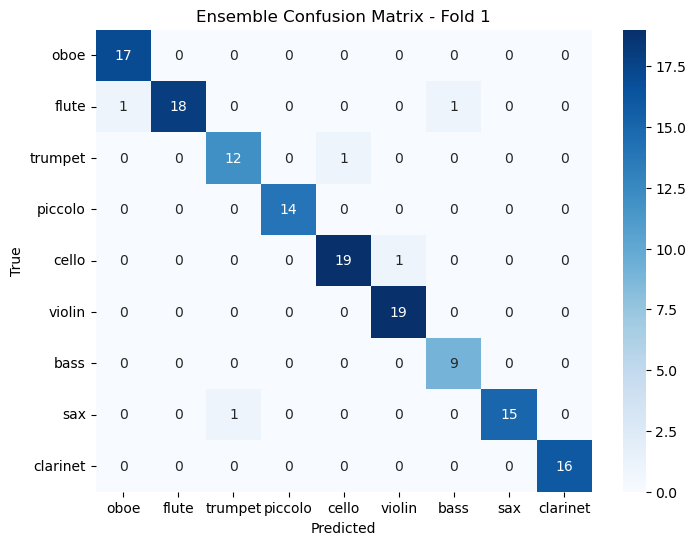

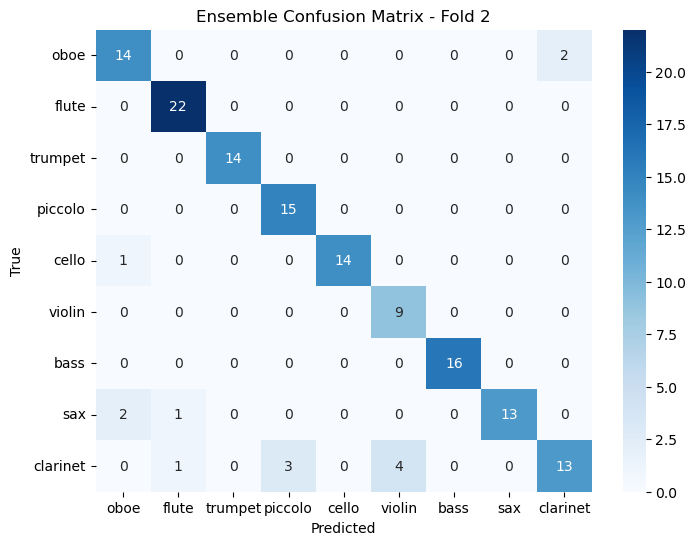

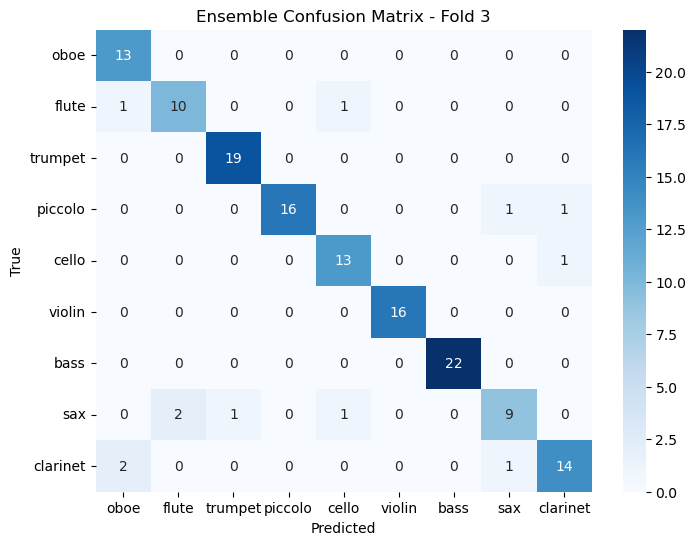

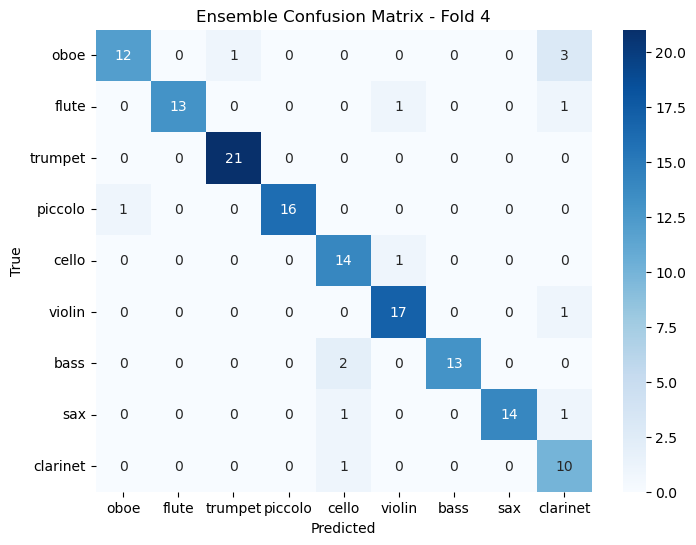

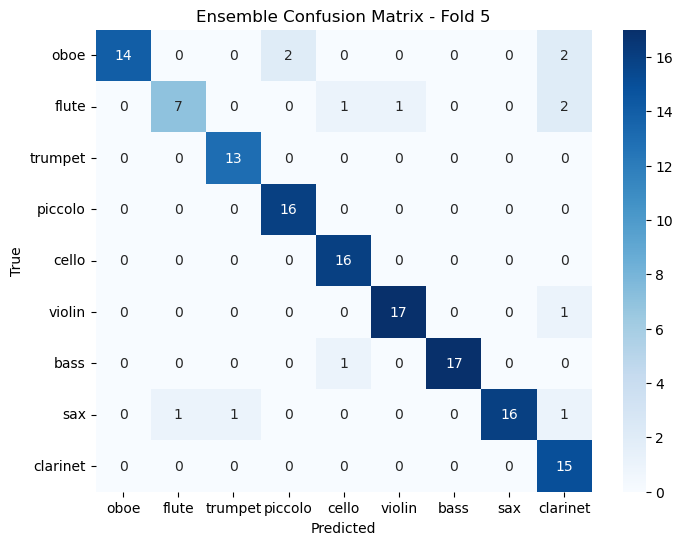

In [7]:
# Display ensemble confusion matrices for each fold
for i, conf_matrix in enumerate(ensemble_results['confusion_matrices']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Ensemble Confusion Matrix - Fold {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [8]:
# Create a summary DataFrame for individual models
performance_data = []
for feature_type, results in individual_results.items():
    accuracies = results['accuracy_list']
    losses = results['loss_list']
    performance_data.append({
        'Feature Type': feature_type.replace('_', ' ').title(),
        'Mean Accuracy': np.mean(accuracies),
        'Std Accuracy': np.std(accuracies),
        'Min Accuracy': np.min(accuracies),
        'Max Accuracy': np.max(accuracies),
        'Mean Loss': np.mean(losses),
        'Std Loss': np.std(losses)
    })

performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.sort_values('Mean Accuracy', ascending=False)
display(performance_df.round(4))

Feature Type  Mean Accuracy  Std Accuracy  Min Accuracy  \
1                 Mfcc         0.8611        0.0274        0.8194   
0      Mel Spectrogram         0.8167        0.0443        0.7361   
8  Harmonic Percussive         0.8014        0.0113        0.7847   
5           Constant Q         0.8014        0.0761        0.6597   
6                  Cqt         0.7903        0.0551        0.7222   
7                 Stft         0.6181        0.1019        0.4861   
3    Spectral Contrast         0.4792        0.0514        0.4097   
2           Chromagram         0.4111        0.0685        0.3333   
4              Tonnetz         0.3736        0.0468        0.3194   
9       Onset Strength         0.1958        0.0436        0.1389   

   Max Accuracy  Mean Loss  Std Loss  
1        0.8958     0.4648    0.1450  
0        0.8681     5.8399    1.2240  
8        0.8125   118.4935   36.2297  
5        0.8819     3.0604    1.1239  
6        0.8611     4.7706    1.7906  
7        0.7361    36.1202   16.8674  
3        0.5417     1.4504    0.1288  
2        0.4931     1.8967    0.2059  
4        0.4583     2.3769    0.2374  
9        0.2500     2.1756    0.0568


Mel Spectrogram Model
Accuracies: [0.8680555820465088, 0.8263888955116272, 0.8402777910232544, 0.7361111044883728, 0.8125]
Mean: 0.8167, Std: 0.0443, Min: 0.7361, Max: 0.8681


precision    recall  f1-score     support
oboe           0.888889  0.941176  0.914286   17.000000
flute          0.937500  0.750000  0.833333   20.000000
trumpet        0.666667  0.769231  0.714286   13.000000
piccolo        1.000000  0.928571  0.962963   14.000000
cello          0.950000  0.950000  0.950000   20.000000
violin         0.882353  0.789474  0.833333   19.000000
bass           1.000000  1.000000  1.000000    9.000000
sax            0.652174  0.937500  0.769231   16.000000
clarinet       1.000000  0.812500  0.896552   16.000000
accuracy       0.868056  0.868056  0.868056    0.868056
macro avg      0.886398  0.875384  0.874887  144.000000
weighted avg   0.886995  0.868056  0.871268  144.000000

precision    recall  f1-score     support
oboe           0.846154  0.687500  0.758621   16.000000
flute          0.857143  0.818182  0.837209   22.000000
trumpet        0.875000  1.000000  0.933333   14.000000
piccolo        0.882353  1.000000  0.937500   15.000000
cello          0.736842  0.933333  0.823529   15.000000
violin         0.562500  1.000000  0.720000    9.000000
bass           1.000000  0.937500  0.967742   16.000000
sax            0.928571  0.812500  0.866667   16.000000
clarinet       0.769231  0.476190  0.588235   21.000000
accuracy       0.826389  0.826389  0.826389    0.826389
macro avg      0.828644  0.851690  0.825871  144.000000
weighted avg   0.840327  0.826389  0.820987  144.000000

precision    recall  f1-score     support
oboe           0.866667  1.000000  0.928571   13.000000
flute          0.727273  0.666667  0.695652   12.000000
trumpet        1.000000  0.947368  0.972973   19.000000
piccolo        1.000000  0.833333  0.909091   18.000000
cello          0.875000  0.500000  0.636364   14.000000
violin         0.615385  1.000000  0.761905   16.000000
bass           0.954545  0.954545  0.954545   22.000000
sax            0.692308  0.692308  0.692308   13.000000
clarinet       0.875000  0.823529  0.848485   17.000000
accuracy       0.840278  0.840278  0.840278    0.840278
macro avg      0.845131  0.824195  0.822210  144.000000
weighted avg   0.860869  0.840278  0.838842  144.000000

precision    recall  f1-score     support
oboe           0.687500  0.687500  0.687500   16.000000
flute          0.875000  0.466667  0.608696   15.000000
trumpet        0.526316  0.952381  0.677966   21.000000
piccolo        1.000000  0.764706  0.866667   17.000000
cello          0.714286  1.000000  0.833333   15.000000
violin         0.909091  0.555556  0.689655   18.000000
bass           1.000000  0.666667  0.800000   15.000000
sax            0.736842  0.875000  0.800000   16.000000
clarinet       0.750000  0.545455  0.631579   11.000000
accuracy       0.736111  0.736111  0.736111    0.736111
macro avg      0.799893  0.723770  0.732822  144.000000
weighted avg   0.793715  0.736111  0.734460  144.000000

precision    recall  f1-score   support
oboe           0.640000  0.888889  0.744186   18.0000
flute          1.000000  0.363636  0.533333   11.0000
trumpet        1.000000  0.846154  0.916667   13.0000
piccolo        0.812500  0.812500  0.812500   16.0000
cello          0.800000  1.000000  0.888889   16.0000
violin         0.800000  0.888889  0.842105   18.0000
bass           1.000000  0.833333  0.909091   18.0000
sax            0.782609  0.947368  0.857143   19.0000
clarinet       0.800000  0.533333  0.640000   15.0000
accuracy       0.812500  0.812500  0.812500    0.8125
macro avg      0.848345  0.790456  0.793768  144.0000
weighted avg   0.837428  0.812500  0.804223  144.0000

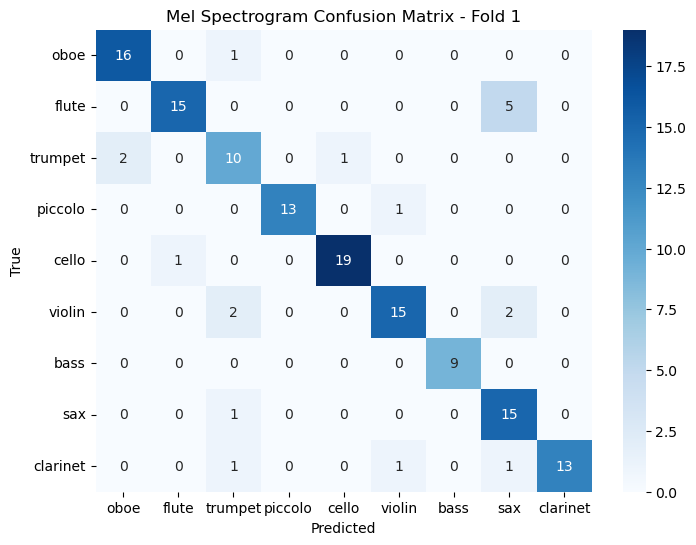

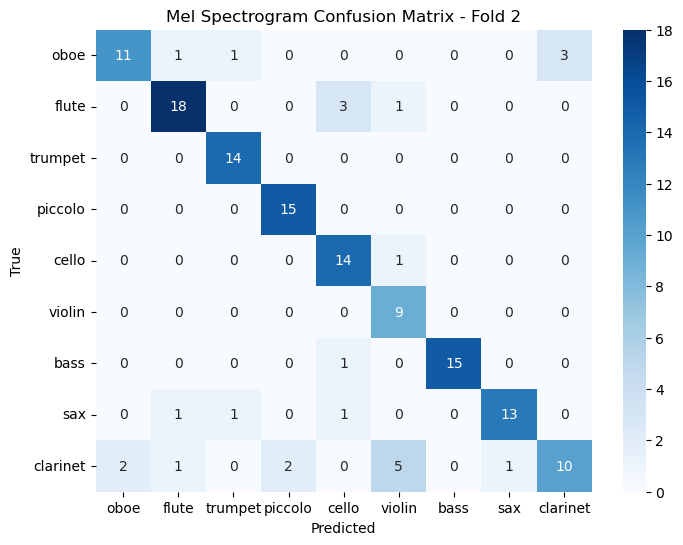

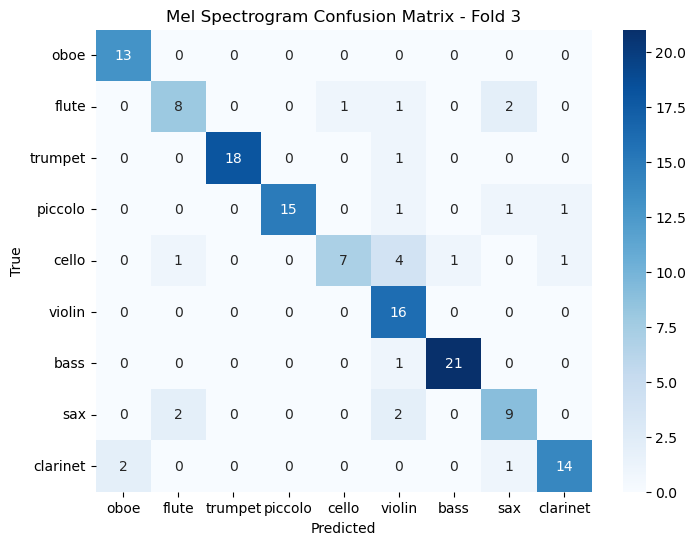

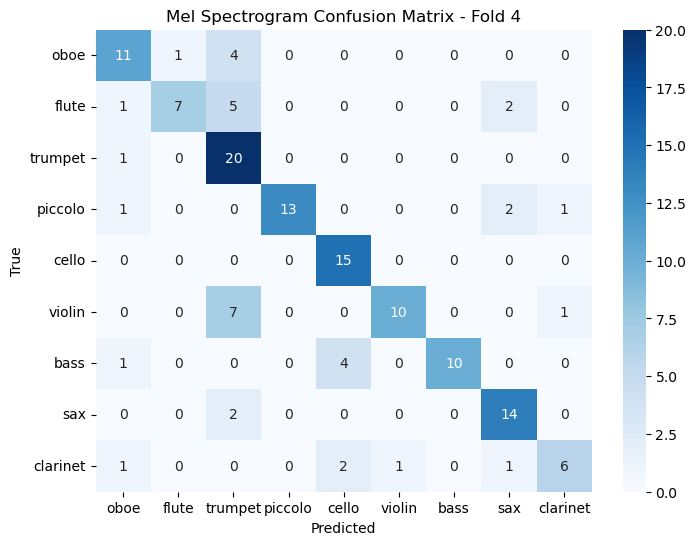

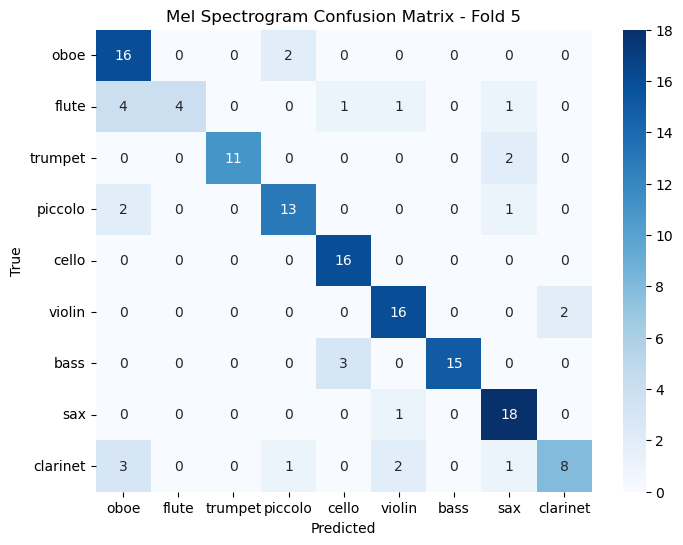


Mfcc Model
Accuracies: [0.875, 0.8958333134651184, 0.8402777910232544, 0.8194444179534912, 0.875]
Mean: 0.8611, Std: 0.0274, Min: 0.8194, Max: 0.8958


precision    recall  f1-score  support
oboe           0.888889  0.941176  0.914286   17.000
flute          0.882353  0.750000  0.810811   20.000
trumpet        0.928571  1.000000  0.962963   13.000
piccolo        1.000000  0.857143  0.923077   14.000
cello          0.857143  0.900000  0.878049   20.000
violin         0.933333  0.736842  0.823529   19.000
bass           1.000000  0.888889  0.941176    9.000
sax            0.695652  1.000000  0.820513   16.000
clarinet       0.875000  0.875000  0.875000   16.000
accuracy       0.875000  0.875000  0.875000    0.875
macro avg      0.895660  0.883228  0.883267  144.000
weighted avg   0.887752  0.875000  0.875052  144.000

precision    recall  f1-score     support
oboe           0.937500  0.937500  0.937500   16.000000
flute          0.869565  0.909091  0.888889   22.000000
trumpet        1.000000  1.000000  1.000000   14.000000
piccolo        0.812500  0.866667  0.838710   15.000000
cello          1.000000  0.866667  0.928571   15.000000
violin         0.888889  0.888889  0.888889    9.000000
bass           0.937500  0.937500  0.937500   16.000000
sax            0.928571  0.812500  0.866667   16.000000
clarinet       0.782609  0.857143  0.818182   21.000000
accuracy       0.895833  0.895833  0.895833    0.895833
macro avg      0.906348  0.897328  0.900545  144.000000
weighted avg   0.900068  0.895833  0.896620  144.000000

precision    recall  f1-score     support
oboe           0.909091  0.769231  0.833333   13.000000
flute          0.888889  0.666667  0.761905   12.000000
trumpet        1.000000  0.947368  0.972973   19.000000
piccolo        0.928571  0.722222  0.812500   18.000000
cello          0.923077  0.857143  0.888889   14.000000
violin         0.933333  0.875000  0.903226   16.000000
bass           0.880000  1.000000  0.936170   22.000000
sax            0.600000  0.692308  0.642857   13.000000
clarinet       0.625000  0.882353  0.731707   17.000000
accuracy       0.840278  0.840278  0.840278    0.840278
macro avg      0.854218  0.823588  0.831507  144.000000
weighted avg   0.860004  0.840278  0.842886  144.000000

precision    recall  f1-score     support
oboe           1.000000  0.687500  0.814815   16.000000
flute          0.714286  0.666667  0.689655   15.000000
trumpet        0.950000  0.904762  0.926829   21.000000
piccolo        0.888889  0.941176  0.914286   17.000000
cello          0.560000  0.933333  0.700000   15.000000
violin         0.928571  0.722222  0.812500   18.000000
bass           0.866667  0.866667  0.866667   15.000000
sax            0.866667  0.812500  0.838710   16.000000
clarinet       0.750000  0.818182  0.782609   11.000000
accuracy       0.819444  0.819444  0.819444    0.819444
macro avg      0.836120  0.817001  0.816230  144.000000
weighted avg   0.847266  0.819444  0.823203  144.000000

precision    recall  f1-score  support
oboe           0.888889  0.888889  0.888889   18.000
flute          0.600000  0.545455  0.571429   11.000
trumpet        0.866667  1.000000  0.928571   13.000
piccolo        0.842105  1.000000  0.914286   16.000
cello          0.888889  1.000000  0.941176   16.000
violin         0.944444  0.944444  0.944444   18.000
bass           1.000000  0.833333  0.909091   18.000
sax            0.833333  0.789474  0.810811   19.000
clarinet       0.923077  0.800000  0.857143   15.000
accuracy       0.875000  0.875000  0.875000    0.875
macro avg      0.865267  0.866844  0.862871  144.000
weighted avg   0.876681  0.875000  0.872713  144.000

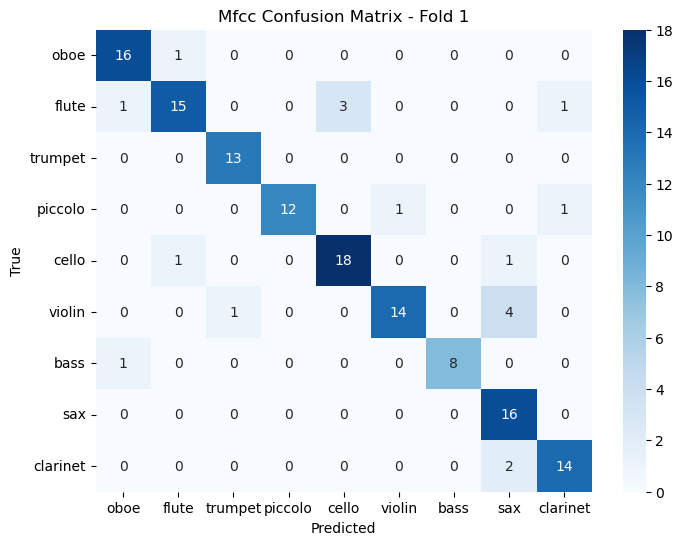

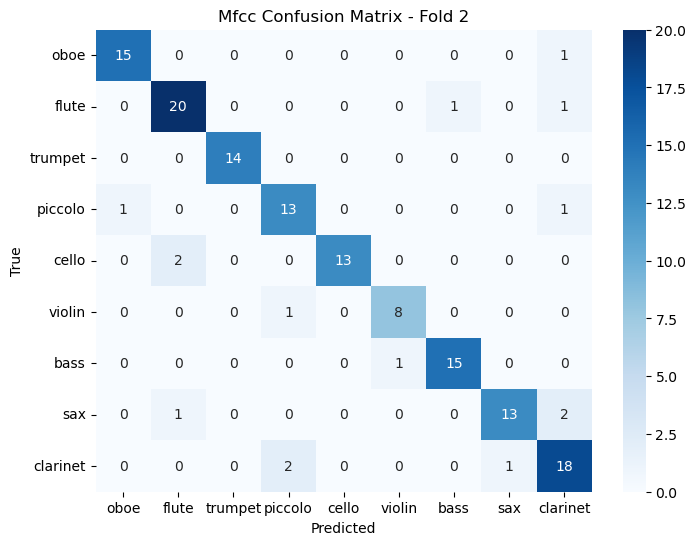

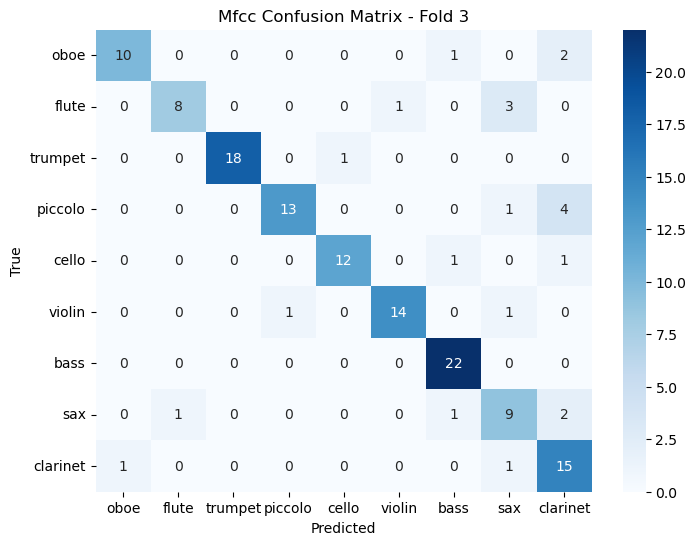

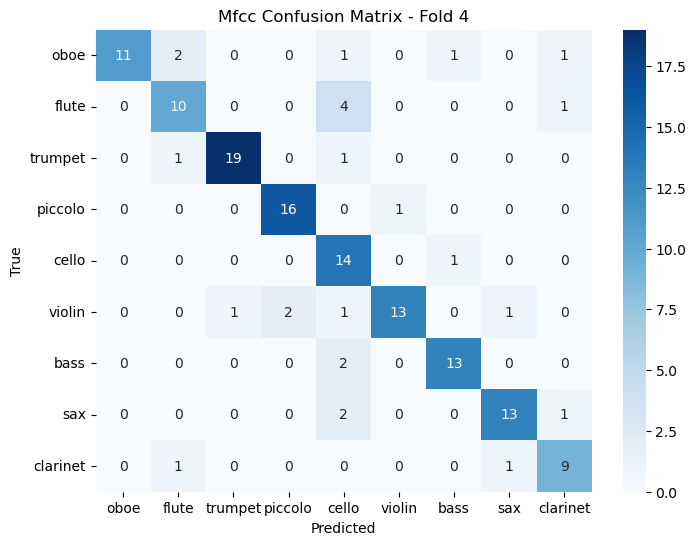

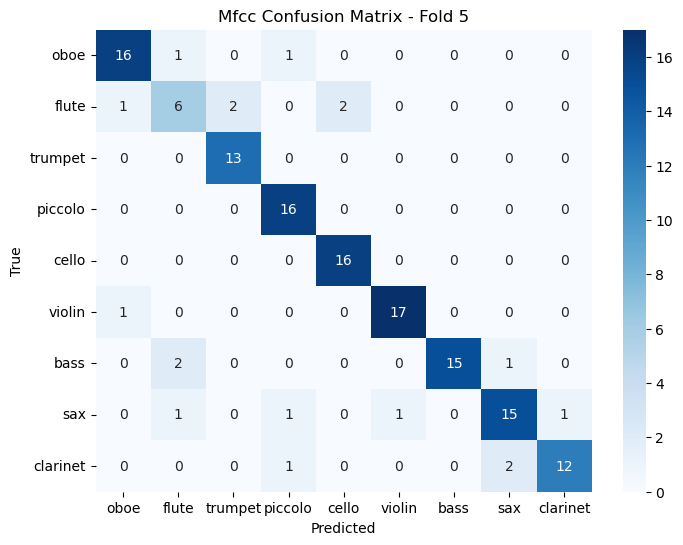


Chromagram Model
Accuracies: [0.4027777910232544, 0.3402777910232544, 0.4861111044883728, 0.4930555522441864, 0.3333333432674408]
Mean: 0.4111, Std: 0.0685, Min: 0.3333, Max: 0.4931


precision    recall  f1-score     support
oboe           0.437500  0.411765  0.424242   17.000000
flute          0.500000  0.450000  0.473684   20.000000
trumpet        0.000000  0.000000  0.000000   13.000000
piccolo        0.500000  0.357143  0.416667   14.000000
cello          0.361111  0.650000  0.464286   20.000000
violin         1.000000  0.263158  0.416667   19.000000
bass           0.391304  1.000000  0.562500    9.000000
sax            0.172414  0.312500  0.222222   16.000000
clarinet       0.714286  0.312500  0.434783   16.000000
accuracy       0.402778  0.402778  0.402778    0.402778
macro avg      0.452957  0.417452  0.379450  144.000000
weighted avg   0.474782  0.402778  0.384001  144.000000

precision    recall  f1-score     support
oboe           0.179487  0.437500  0.254545   16.000000
flute          0.666667  0.454545  0.540541   22.000000
trumpet        0.500000  0.285714  0.363636   14.000000
piccolo        0.307692  0.533333  0.390244   15.000000
cello          0.600000  0.200000  0.300000   15.000000
violin         0.210526  0.444444  0.285714    9.000000
bass           1.000000  0.312500  0.476190   16.000000
sax            0.142857  0.125000  0.133333   16.000000
clarinet       0.461538  0.285714  0.352941   21.000000
accuracy       0.340278  0.340278  0.340278    0.340278
macro avg      0.452085  0.342084  0.344127  144.000000
weighted avg   0.472407  0.340278  0.355172  144.000000

precision    recall  f1-score     support
oboe           0.750000  0.461538  0.571429   13.000000
flute          0.454545  0.416667  0.434783   12.000000
trumpet        0.500000  0.736842  0.595745   19.000000
piccolo        0.727273  0.444444  0.551724   18.000000
cello          0.500000  0.285714  0.363636   14.000000
violin         0.358974  0.875000  0.509091   16.000000
bass           0.916667  0.500000  0.647059   22.000000
sax            0.100000  0.076923  0.086957   13.000000
clarinet       0.411765  0.411765  0.411765   17.000000
accuracy       0.486111  0.486111  0.486111    0.486111
macro avg      0.524358  0.467655  0.463576  144.000000
weighted avg   0.548651  0.486111  0.482627  144.000000

precision    recall  f1-score     support
oboe           0.428571  0.562500  0.486486   16.000000
flute          0.833333  0.666667  0.740741   15.000000
trumpet        0.500000  0.380952  0.432432   21.000000
piccolo        0.625000  0.294118  0.400000   17.000000
cello          0.437500  0.466667  0.451613   15.000000
violin         0.404762  0.944444  0.566667   18.000000
bass           0.700000  0.466667  0.560000   15.000000
sax            0.333333  0.250000  0.285714   16.000000
clarinet       0.571429  0.363636  0.444444   11.000000
accuracy       0.493056  0.493056  0.493056    0.493056
macro avg      0.537103  0.488406  0.485344  144.000000
weighted avg   0.530899  0.493056  0.483406  144.000000

precision    recall  f1-score     support
oboe           0.538462  0.388889  0.451613   18.000000
flute          0.192308  0.454545  0.270270   11.000000
trumpet        0.227273  0.384615  0.285714   13.000000
piccolo        1.000000  0.187500  0.315789   16.000000
cello          0.500000  0.375000  0.428571   16.000000
violin         0.285714  0.222222  0.250000   18.000000
bass           1.000000  0.333333  0.500000   18.000000
sax            0.428571  0.157895  0.230769   19.000000
clarinet       0.219512  0.600000  0.321429   15.000000
accuracy       0.333333  0.333333  0.333333    0.333333
macro avg      0.487982  0.344889  0.339351  144.000000
weighted avg   0.509310  0.333333  0.343279  144.000000

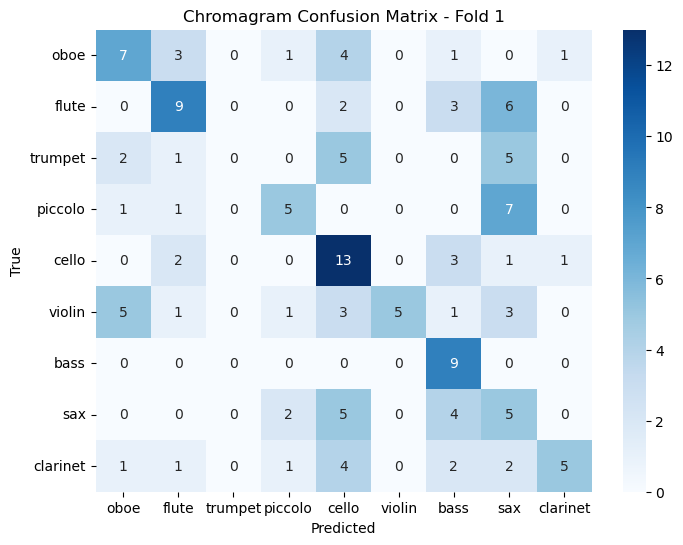

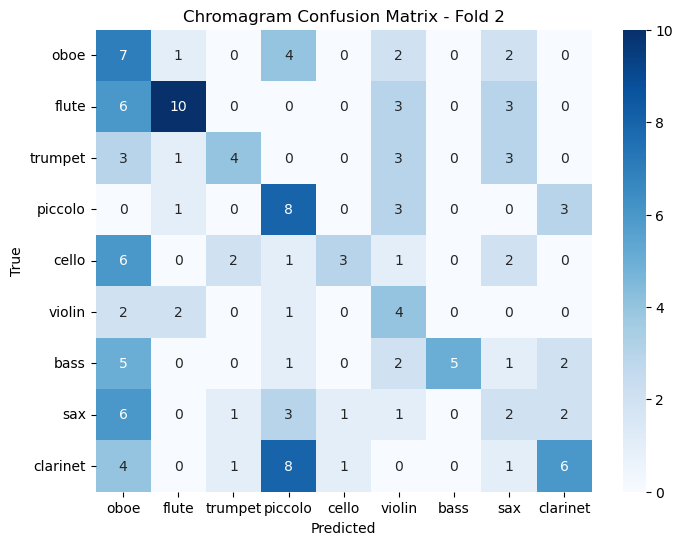

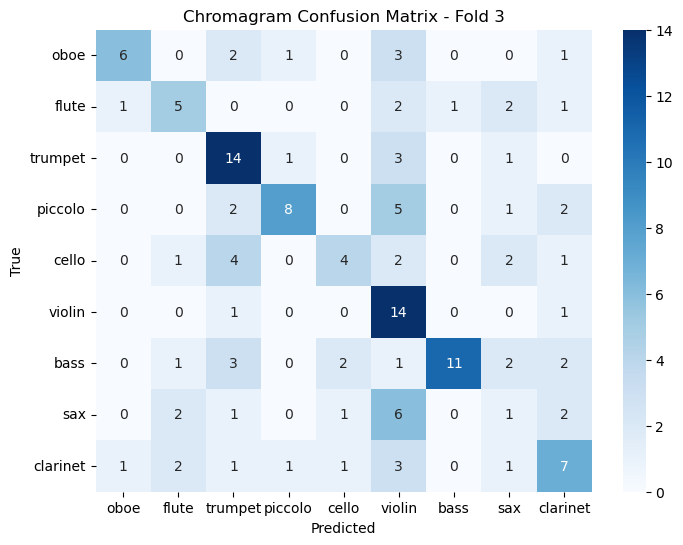

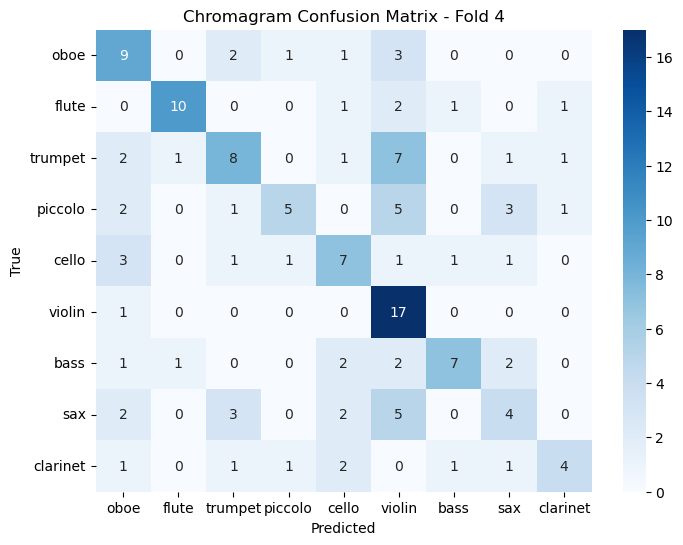

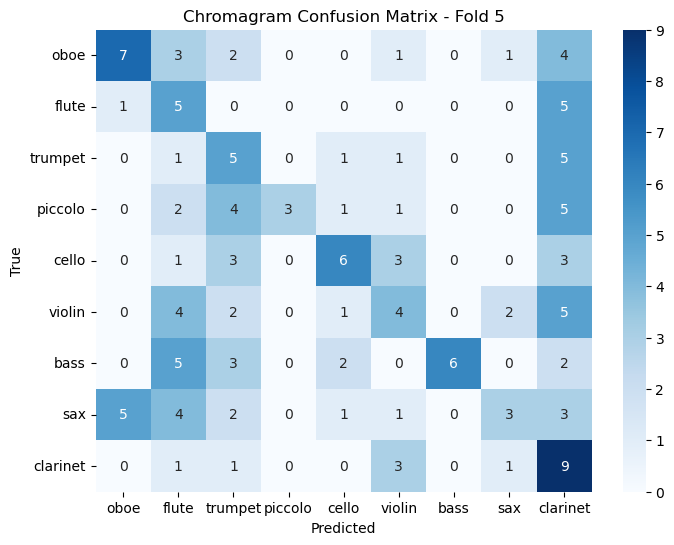


Spectral Contrast Model
Accuracies: [0.4444444477558136, 0.5347222089767456, 0.5416666865348816, 0.4652777910232544, 0.4097222089767456]
Mean: 0.4792, Std: 0.0514, Min: 0.4097, Max: 0.5417


precision    recall  f1-score     support
oboe           0.230769  0.176471  0.200000   17.000000
flute          0.434783  0.500000  0.465116   20.000000
trumpet        0.200000  0.076923  0.111111   13.000000
piccolo        0.529412  0.642857  0.580645   14.000000
cello          0.500000  0.550000  0.523810   20.000000
violin         0.411765  0.368421  0.388889   19.000000
bass           0.615385  0.888889  0.727273    9.000000
sax            0.391304  0.562500  0.461538   16.000000
clarinet       0.545455  0.375000  0.444444   16.000000
accuracy       0.444444  0.444444  0.444444    0.444444
macro avg      0.428764  0.460118  0.433647  144.000000
weighted avg   0.423477  0.444444  0.424875  144.000000

precision    recall  f1-score     support
oboe           0.400000  0.375000  0.387097   16.000000
flute          0.647059  0.500000  0.564103   22.000000
trumpet        0.555556  0.714286  0.625000   14.000000
piccolo        0.428571  0.400000  0.413793   15.000000
cello          0.421053  0.533333  0.470588   15.000000
violin         0.263158  0.555556  0.357143    9.000000
bass           0.933333  0.875000  0.903226   16.000000
sax            0.888889  0.500000  0.640000   16.000000
clarinet       0.500000  0.428571  0.461538   21.000000
accuracy       0.534722  0.534722  0.534722    0.534722
macro avg      0.559735  0.542416  0.535832  144.000000
weighted avg   0.577649  0.534722  0.543179  144.000000

precision    recall  f1-score     support
oboe           0.454545  0.384615  0.416667   13.000000
flute          1.000000  0.250000  0.400000   12.000000
trumpet        0.600000  0.631579  0.615385   19.000000
piccolo        0.428571  0.333333  0.375000   18.000000
cello          0.476190  0.714286  0.571429   14.000000
violin         0.583333  0.437500  0.500000   16.000000
bass           0.809524  0.772727  0.790698   22.000000
sax            0.500000  0.615385  0.551724   13.000000
clarinet       0.384615  0.588235  0.465116   17.000000
accuracy       0.541667  0.541667  0.541667    0.541667
macro avg      0.581864  0.525296  0.520669  144.000000
weighted avg   0.582440  0.541667  0.535651  144.000000

precision    recall  f1-score     support
oboe           0.500000  0.437500  0.466667   16.000000
flute          0.571429  0.533333  0.551724   15.000000
trumpet        0.571429  0.380952  0.457143   21.000000
piccolo        0.125000  0.058824  0.080000   17.000000
cello          0.476190  0.666667  0.555556   15.000000
violin         0.481481  0.722222  0.577778   18.000000
bass           0.550000  0.733333  0.628571   15.000000
sax            0.666667  0.125000  0.210526   16.000000
clarinet       0.304348  0.636364  0.411765   11.000000
accuracy       0.465278  0.465278  0.465278    0.465278
macro avg      0.471838  0.477133  0.437748  144.000000
weighted avg   0.477573  0.465278  0.435849  144.000000

precision    recall  f1-score     support
oboe           0.750000  0.166667  0.272727   18.000000
flute          0.333333  0.454545  0.384615   11.000000
trumpet        0.333333  0.538462  0.411765   13.000000
piccolo        0.318182  0.437500  0.368421   16.000000
cello          0.562500  0.562500  0.562500   16.000000
violin         0.636364  0.388889  0.482759   18.000000
bass           0.900000  0.500000  0.642857   18.000000
sax            0.333333  0.157895  0.214286   19.000000
clarinet       0.250000  0.600000  0.352941   15.000000
accuracy       0.409722  0.409722  0.409722    0.409722
macro avg      0.490783  0.422940  0.410319  144.000000
weighted avg   0.509228  0.409722  0.409821  144.000000

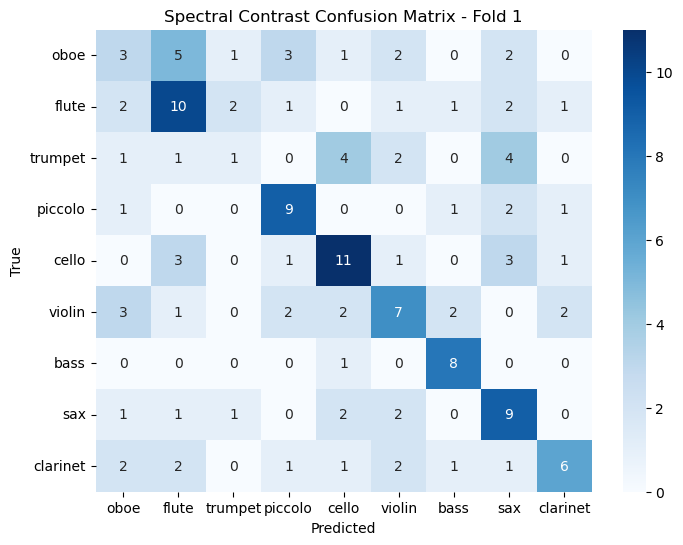

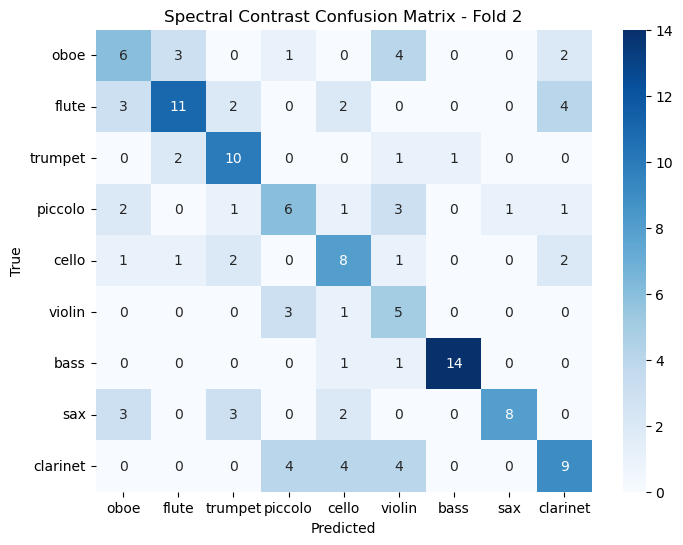

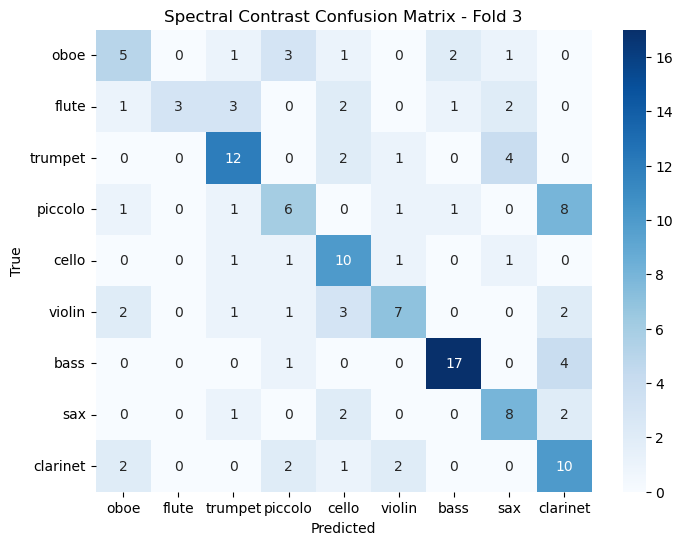

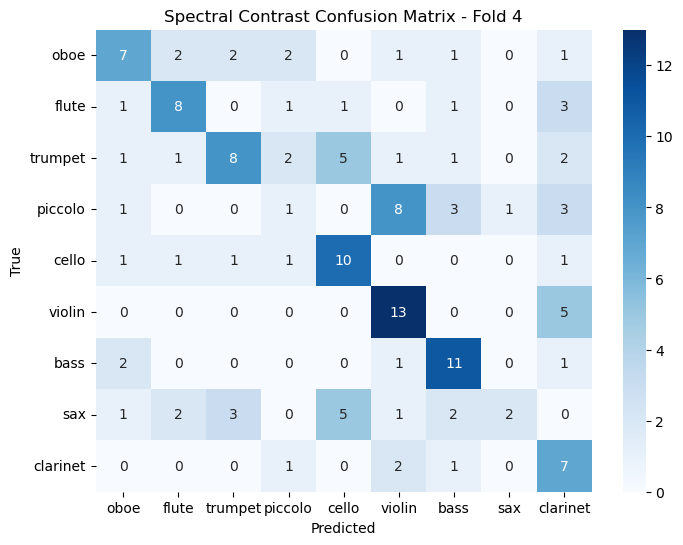

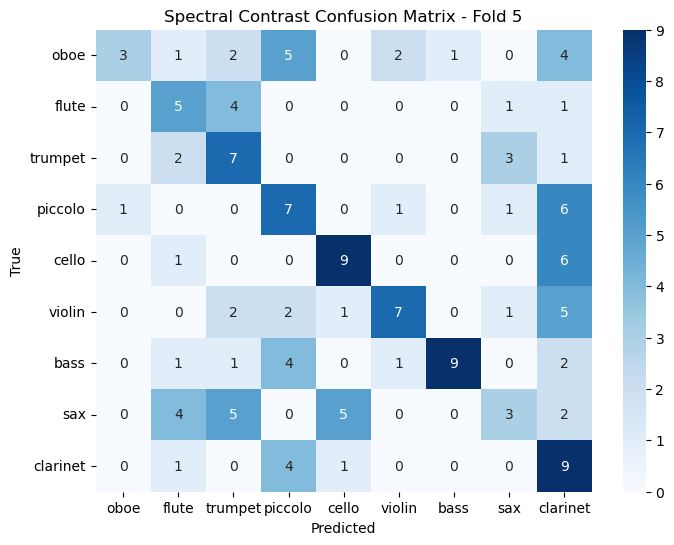


Tonnetz Model
Accuracies: [0.3194444477558136, 0.3819444477558136, 0.4583333432674408, 0.3541666567325592, 0.3541666567325592]
Mean: 0.3736, Std: 0.0468, Min: 0.3194, Max: 0.4583


precision    recall  f1-score     support
oboe           0.250000  0.117647  0.160000   17.000000
flute          0.615385  0.400000  0.484848   20.000000
trumpet        0.750000  0.230769  0.352941   13.000000
piccolo        0.600000  0.428571  0.500000   14.000000
cello          0.800000  0.200000  0.320000   20.000000
violin         0.222222  0.105263  0.142857   19.000000
bass           0.140351  0.888889  0.242424    9.000000
sax            0.500000  0.375000  0.428571   16.000000
clarinet       0.269231  0.437500  0.333333   16.000000
accuracy       0.319444  0.319444  0.319444    0.319444
macro avg      0.460799  0.353738  0.329442  144.000000
weighted avg   0.475700  0.319444  0.329804  144.000000

precision    recall  f1-score     support
oboe           0.450000  0.562500  0.500000   16.000000
flute          0.714286  0.227273  0.344828   22.000000
trumpet        0.285714  0.142857  0.190476   14.000000
piccolo        0.500000  0.333333  0.400000   15.000000
cello          0.360000  0.600000  0.450000   15.000000
violin         0.206897  0.666667  0.315789    9.000000
bass           0.458333  0.687500  0.550000   16.000000
sax            0.111111  0.062500  0.080000   16.000000
clarinet       0.538462  0.333333  0.411765   21.000000
accuracy       0.381944  0.381944  0.381944    0.381944
macro avg      0.402756  0.401774  0.360318  144.000000
weighted avg   0.431216  0.381944  0.365084  144.000000

precision    recall  f1-score     support
oboe           0.500000  0.153846  0.235294   13.000000
flute          0.750000  0.250000  0.375000   12.000000
trumpet        0.454545  0.526316  0.487805   19.000000
piccolo        0.466667  0.388889  0.424242   18.000000
cello          0.321429  0.642857  0.428571   14.000000
violin         0.473684  0.562500  0.514286   16.000000
bass           0.567568  0.954545  0.711864   22.000000
sax            0.222222  0.153846  0.181818   13.000000
clarinet       0.500000  0.176471  0.260870   17.000000
accuracy       0.458333  0.458333  0.458333    0.458333
macro avg      0.472902  0.423252  0.402195  144.000000
weighted avg   0.475630  0.458333  0.424663  144.000000

precision    recall  f1-score     support
oboe           0.000000  0.000000  0.000000   16.000000
flute          0.333333  0.066667  0.111111   15.000000
trumpet        1.000000  0.333333  0.500000   21.000000
piccolo        0.333333  0.294118  0.312500   17.000000
cello          0.333333  0.600000  0.428571   15.000000
violin         0.380952  0.444444  0.410256   18.000000
bass           0.272727  1.000000  0.428571   15.000000
sax            0.461538  0.375000  0.413793   16.000000
clarinet       0.000000  0.000000  0.000000   11.000000
accuracy       0.354167  0.354167  0.354167    0.354167
macro avg      0.346135  0.345951  0.289423  144.000000
weighted avg   0.381940  0.354167  0.307928  144.000000

precision    recall  f1-score     support
oboe           0.666667  0.222222  0.333333   18.000000
flute          0.500000  0.181818  0.266667   11.000000
trumpet        0.428571  0.230769  0.300000   13.000000
piccolo        0.400000  0.250000  0.307692   16.000000
cello          0.384615  0.312500  0.344828   16.000000
violin         0.300000  0.333333  0.315789   18.000000
bass           0.444444  0.666667  0.533333   18.000000
sax            0.192308  0.263158  0.222222   19.000000
clarinet       0.322581  0.666667  0.434783   15.000000
accuracy       0.354167  0.354167  0.354167    0.354167
macro avg      0.404354  0.347459  0.339850  144.000000
weighted avg   0.399429  0.354167  0.342374  144.000000

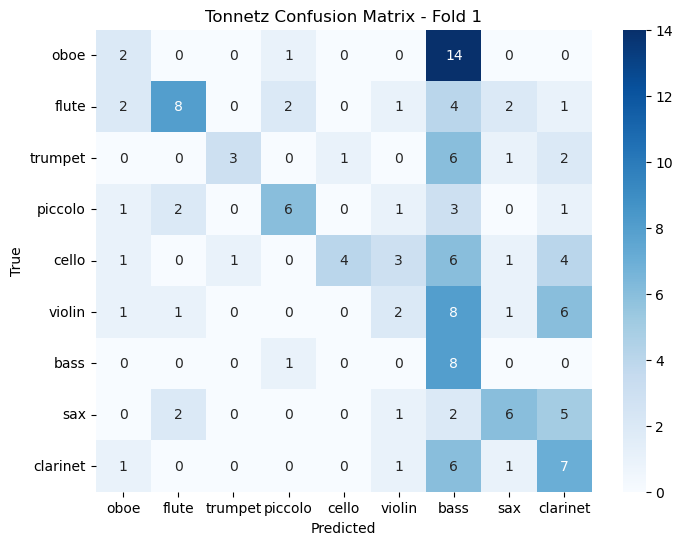

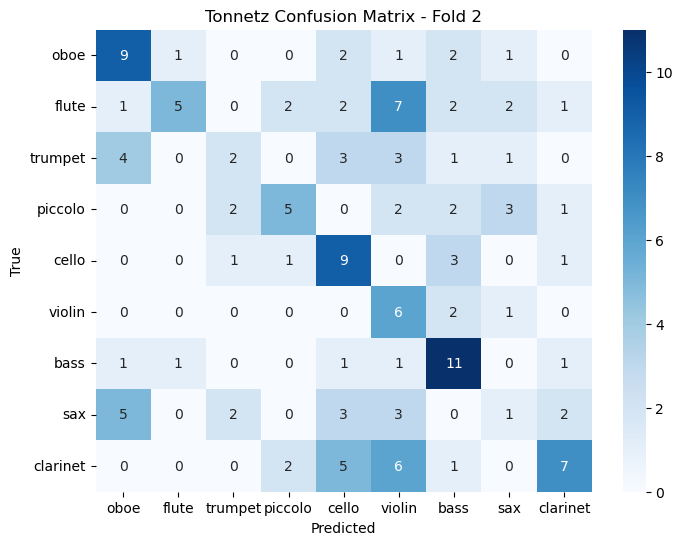

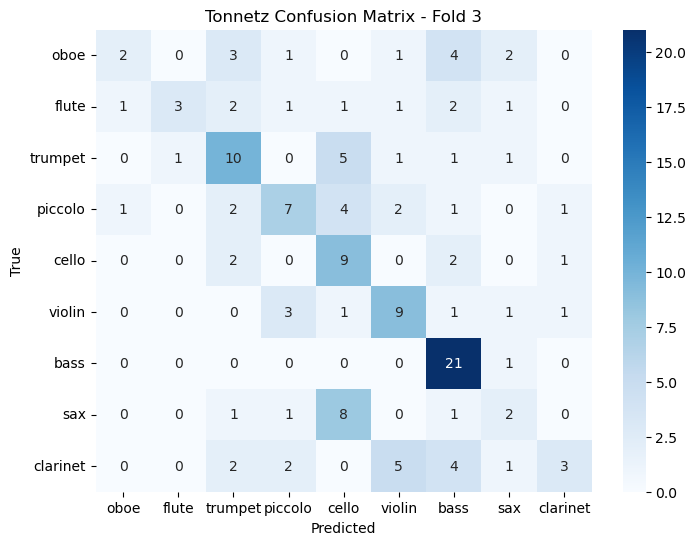

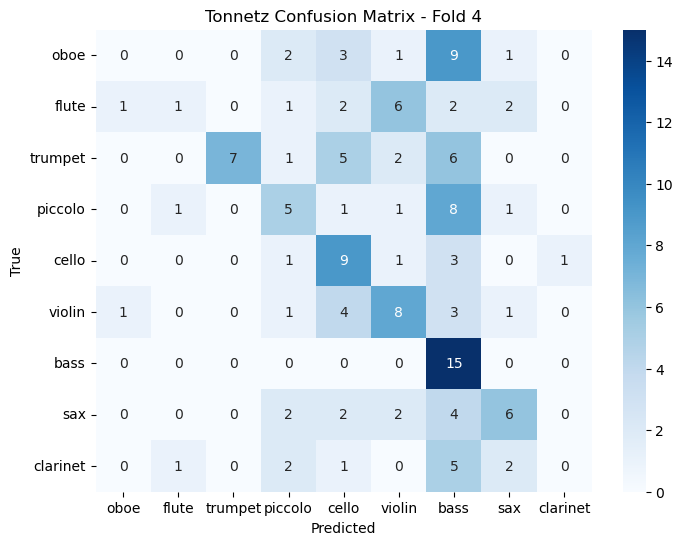

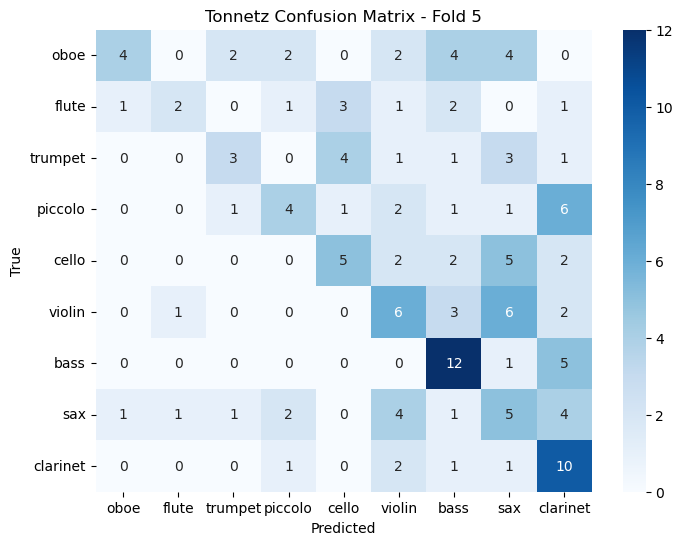


Constant Q Model
Accuracies: [0.8194444179534912, 0.7986111044883728, 0.8819444179534912, 0.8472222089767456, 0.6597222089767456]
Mean: 0.8014, Std: 0.0761, Min: 0.6597, Max: 0.8819


precision    recall  f1-score     support
oboe           0.750000  0.882353  0.810811   17.000000
flute          0.750000  0.600000  0.666667   20.000000
trumpet        0.687500  0.846154  0.758621   13.000000
piccolo        0.928571  0.928571  0.928571   14.000000
cello          0.950000  0.950000  0.950000   20.000000
violin         0.947368  0.947368  0.947368   19.000000
bass           1.000000  0.888889  0.941176    9.000000
sax            0.562500  0.562500  0.562500   16.000000
clarinet       0.866667  0.812500  0.838710   16.000000
accuracy       0.819444  0.819444  0.819444    0.819444
macro avg      0.826956  0.824260  0.822714  144.000000
weighted avg   0.823293  0.819444  0.818536  144.000000

precision    recall  f1-score     support
oboe           0.764706  0.812500  0.787879   16.000000
flute          0.740741  0.909091  0.816327   22.000000
trumpet        0.916667  0.785714  0.846154   14.000000
piccolo        0.928571  0.866667  0.896552   15.000000
cello          1.000000  0.800000  0.888889   15.000000
violin         0.473684  1.000000  0.642857    9.000000
bass           0.941176  1.000000  0.969697   16.000000
sax            0.812500  0.812500  0.812500   16.000000
clarinet       0.800000  0.380952  0.516129   21.000000
accuracy       0.798611  0.798611  0.798611    0.798611
macro avg      0.819783  0.818603  0.797443  144.000000
weighted avg   0.829274  0.798611  0.793976  144.000000

precision    recall  f1-score     support
oboe           0.800000  0.923077  0.857143   13.000000
flute          0.714286  0.833333  0.769231   12.000000
trumpet        0.900000  0.947368  0.923077   19.000000
piccolo        1.000000  0.833333  0.909091   18.000000
cello          0.928571  0.928571  0.928571   14.000000
violin         0.842105  1.000000  0.914286   16.000000
bass           1.000000  0.909091  0.952381   22.000000
sax            0.727273  0.615385  0.666667   13.000000
clarinet       0.937500  0.882353  0.909091   17.000000
accuracy       0.881944  0.881944  0.881944    0.881944
macro avg      0.872193  0.874724  0.869949  144.000000
weighted avg   0.888452  0.881944  0.881791  144.000000

precision    recall  f1-score     support
oboe           0.857143  0.750000  0.800000   16.000000
flute          0.900000  0.600000  0.720000   15.000000
trumpet        1.000000  0.761905  0.864865   21.000000
piccolo        0.888889  0.941176  0.914286   17.000000
cello          0.928571  0.866667  0.896552   15.000000
violin         0.789474  0.833333  0.810811   18.000000
bass           1.000000  1.000000  1.000000   15.000000
sax            0.937500  0.937500  0.937500   16.000000
clarinet       0.500000  1.000000  0.666667   11.000000
accuracy       0.847222  0.847222  0.847222    0.847222
macro avg      0.866842  0.854509  0.845631  144.000000
weighted avg   0.881698  0.847222  0.851953  144.000000

precision    recall  f1-score     support
oboe           0.700000  0.388889  0.500000   18.000000
flute          0.600000  0.545455  0.571429   11.000000
trumpet        0.480000  0.923077  0.631579   13.000000
piccolo        0.777778  0.875000  0.823529   16.000000
cello          0.590909  0.812500  0.684211   16.000000
violin         0.580645  1.000000  0.734694   18.000000
bass           1.000000  0.722222  0.838710   18.000000
sax            0.900000  0.473684  0.620690   19.000000
clarinet       0.600000  0.200000  0.300000   15.000000
accuracy       0.659722  0.659722  0.659722    0.659722
macro avg      0.692148  0.660092  0.633871  144.000000
weighted avg   0.707574  0.659722  0.640517  144.000000

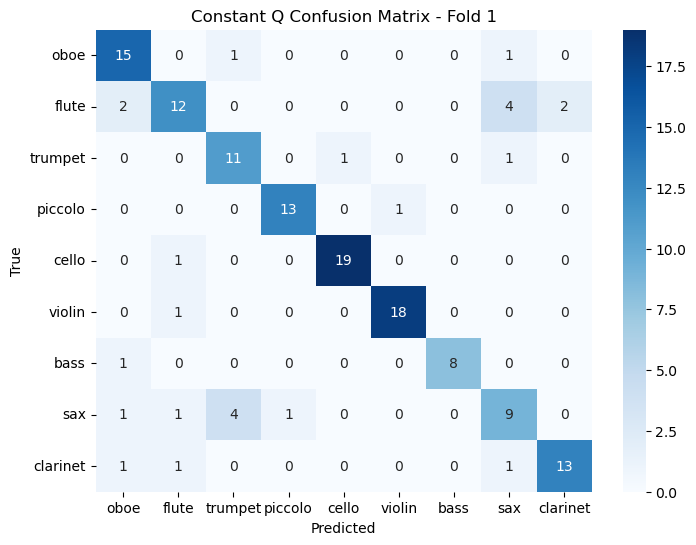

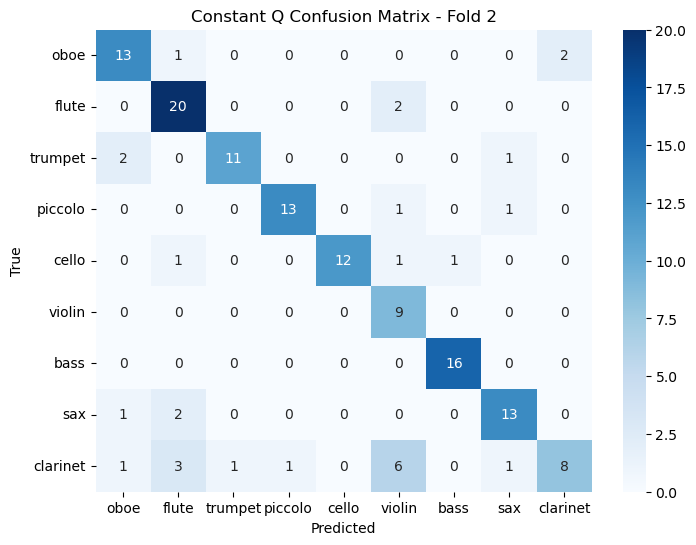

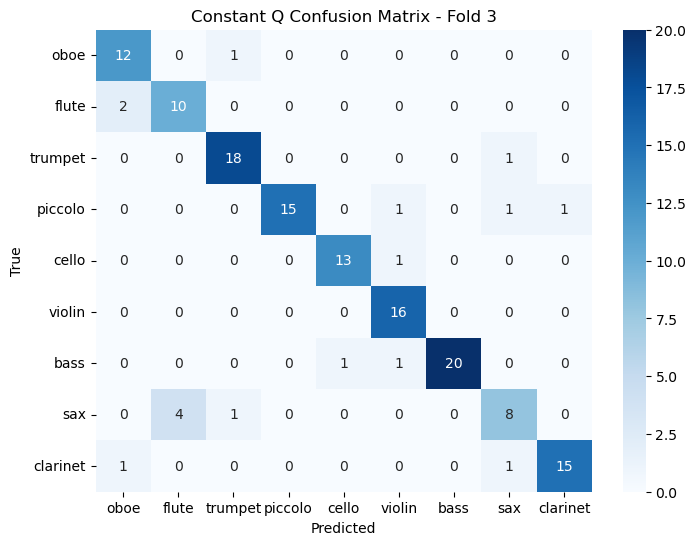

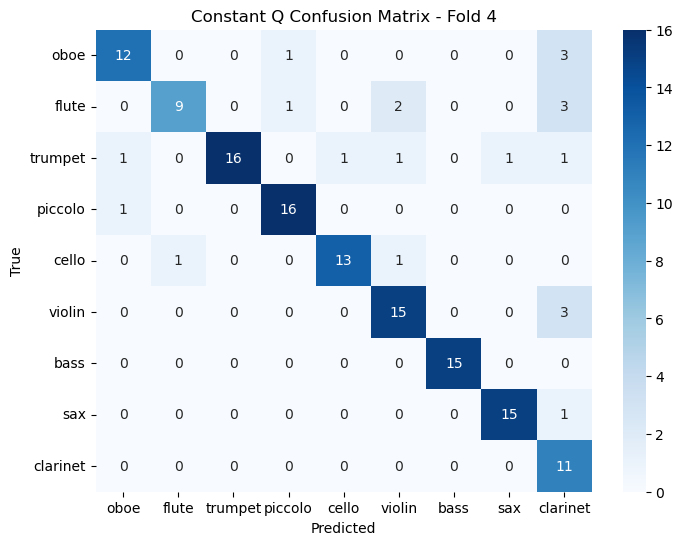

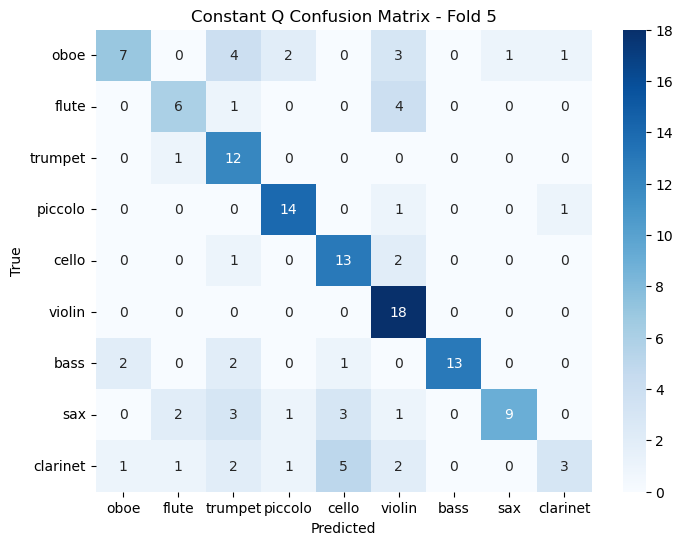


Cqt Model
Accuracies: [0.8125, 0.7291666865348816, 0.8611111044883728, 0.7222222089767456, 0.8263888955116272]
Mean: 0.7903, Std: 0.0551, Min: 0.7222, Max: 0.8611


precision    recall  f1-score   support
oboe           0.882353  0.882353  0.882353   17.0000
flute          0.800000  0.400000  0.533333   20.0000
trumpet        0.650000  1.000000  0.787879   13.0000
piccolo        0.875000  1.000000  0.933333   14.0000
cello          1.000000  0.850000  0.918919   20.0000
violin         0.800000  0.842105  0.820513   19.0000
bass           1.000000  1.000000  1.000000    9.0000
sax            0.750000  0.750000  0.750000   16.0000
clarinet       0.684211  0.812500  0.742857   16.0000
accuracy       0.812500  0.812500  0.812500    0.8125
macro avg      0.826840  0.837440  0.818799  144.0000
weighted avg   0.825329  0.812500  0.804372  144.0000

precision    recall  f1-score     support
oboe           0.642857  0.562500  0.600000   16.000000
flute          0.571429  0.909091  0.701754   22.000000
trumpet        0.722222  0.928571  0.812500   14.000000
piccolo        0.823529  0.933333  0.875000   15.000000
cello          0.916667  0.733333  0.814815   15.000000
violin         0.692308  1.000000  0.818182    9.000000
bass           0.941176  1.000000  0.969697   16.000000
sax            1.000000  0.437500  0.608696   16.000000
clarinet       0.545455  0.285714  0.375000   21.000000
accuracy       0.729167  0.729167  0.729167    0.729167
macro avg      0.761738  0.754449  0.730627  144.000000
weighted avg   0.748718  0.729167  0.710095  144.000000

precision    recall  f1-score     support
oboe           0.733333  0.846154  0.785714   13.000000
flute          0.700000  0.583333  0.636364   12.000000
trumpet        0.947368  0.947368  0.947368   19.000000
piccolo        0.944444  0.944444  0.944444   18.000000
cello          1.000000  0.857143  0.923077   14.000000
violin         0.941176  1.000000  0.969697   16.000000
bass           0.814815  1.000000  0.897959   22.000000
sax            0.777778  0.538462  0.636364   13.000000
clarinet       0.823529  0.823529  0.823529   17.000000
accuracy       0.861111  0.861111  0.861111    0.861111
macro avg      0.853605  0.837826  0.840502  144.000000
weighted avg   0.861314  0.861111  0.856366  144.000000

precision    recall  f1-score     support
oboe           0.666667  0.375000  0.480000   16.000000
flute          0.500000  0.800000  0.615385   15.000000
trumpet        0.760000  0.904762  0.826087   21.000000
piccolo        0.615385  0.941176  0.744186   17.000000
cello          0.705882  0.800000  0.750000   15.000000
violin         0.933333  0.777778  0.848485   18.000000
bass           1.000000  0.600000  0.750000   15.000000
sax            1.000000  0.375000  0.545455   16.000000
clarinet       0.769231  0.909091  0.833333   11.000000
accuracy       0.722222  0.722222  0.722222    0.722222
macro avg      0.772278  0.720312  0.710326  144.000000
weighted avg   0.773875  0.722222  0.712336  144.000000

precision    recall  f1-score     support
oboe           1.000000  0.500000  0.666667   18.000000
flute          0.857143  0.545455  0.666667   11.000000
trumpet        0.666667  0.769231  0.714286   13.000000
piccolo        0.761905  1.000000  0.864865   16.000000
cello          0.888889  1.000000  0.941176   16.000000
violin         1.000000  0.944444  0.971429   18.000000
bass           1.000000  0.944444  0.971429   18.000000
sax            0.809524  0.894737  0.850000   19.000000
clarinet       0.578947  0.733333  0.647059   15.000000
accuracy       0.826389  0.826389  0.826389    0.826389
macro avg      0.840342  0.814627  0.810397  144.000000
weighted avg   0.851202  0.826389  0.821827  144.000000

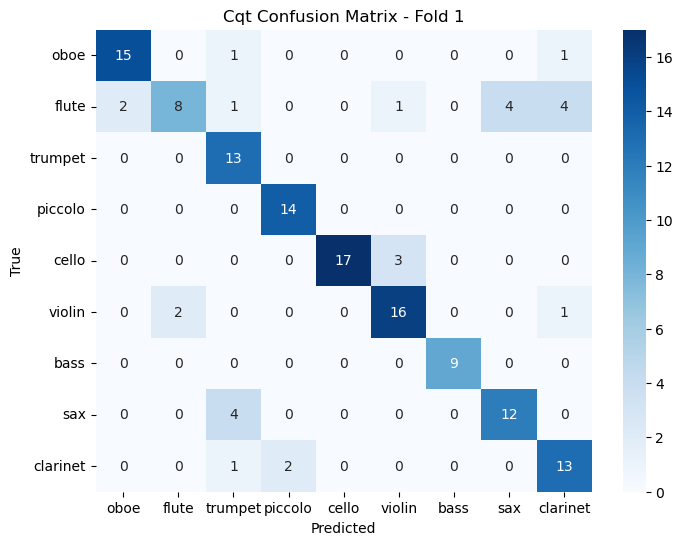

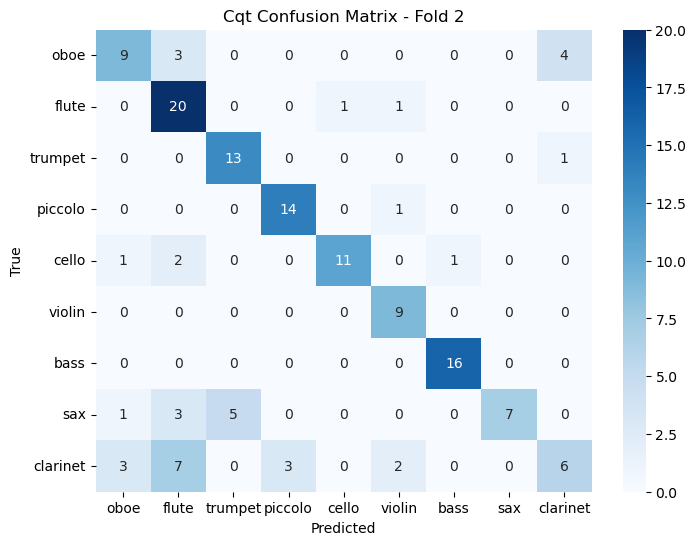

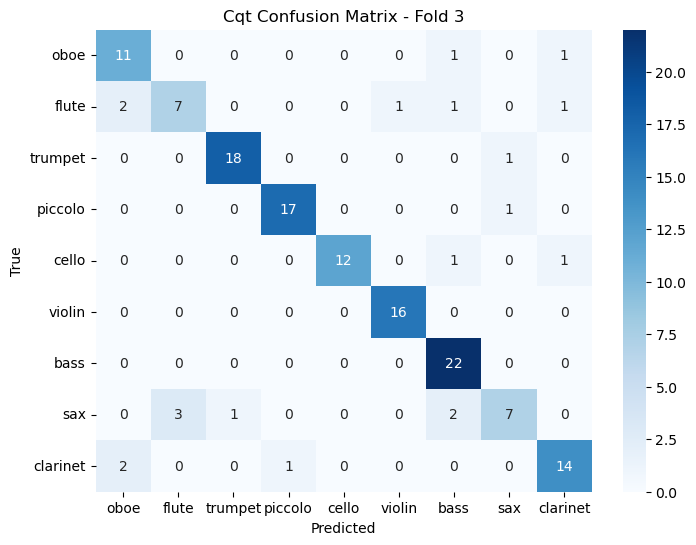

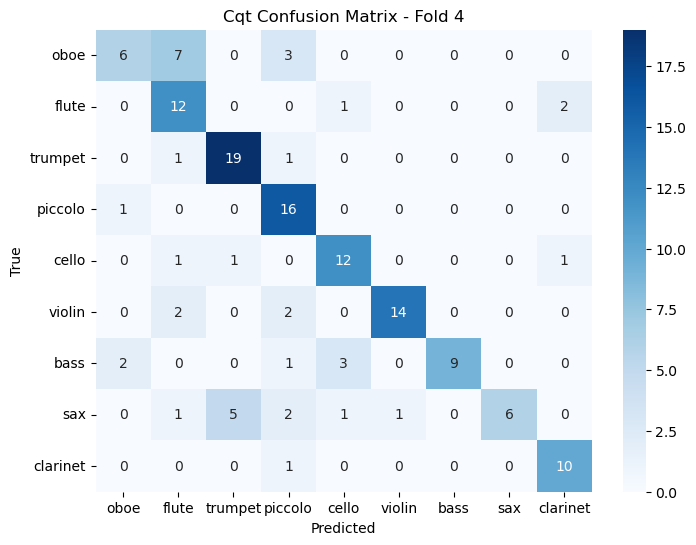

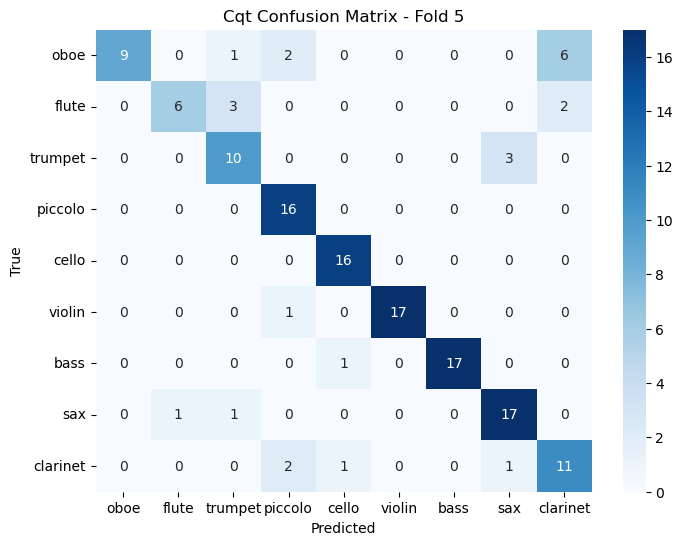


Stft Model
Accuracies: [0.7361111044883728, 0.4861111044883728, 0.7361111044883728, 0.5902777910232544, 0.5416666865348816]
Mean: 0.6181, Std: 0.1019, Min: 0.4861, Max: 0.7361


precision    recall  f1-score     support
oboe           0.750000  0.705882  0.727273   17.000000
flute          0.590909  0.650000  0.619048   20.000000
trumpet        1.000000  0.538462  0.700000   13.000000
piccolo        0.705882  0.857143  0.774194   14.000000
cello          0.789474  0.750000  0.769231   20.000000
violin         0.680000  0.894737  0.772727   19.000000
bass           0.666667  0.888889  0.761905    9.000000
sax            0.923077  0.750000  0.827586   16.000000
clarinet       0.769231  0.625000  0.689655   16.000000
accuracy       0.736111  0.736111  0.736111    0.736111
macro avg      0.763915  0.740012  0.737958  144.000000
weighted avg   0.758590  0.736111  0.735297  144.000000

precision    recall  f1-score     support
oboe           0.370370  0.625000  0.465116   16.000000
flute          0.000000  0.000000  0.000000   22.000000
trumpet        0.545455  0.857143  0.666667   14.000000
piccolo        0.785714  0.733333  0.758621   15.000000
cello          1.000000  0.133333  0.235294   15.000000
violin         1.000000  0.222222  0.363636    9.000000
bass           0.333333  1.000000  0.500000   16.000000
sax            0.636364  0.437500  0.518519   16.000000
clarinet       0.555556  0.476190  0.512821   21.000000
accuracy       0.486111  0.486111  0.486111    0.486111
macro avg      0.580755  0.498302  0.446741  144.000000
weighted avg   0.531457  0.486111  0.430710  144.000000

precision    recall  f1-score     support
oboe           0.909091  0.769231  0.833333   13.000000
flute          0.611111  0.916667  0.733333   12.000000
trumpet        1.000000  0.789474  0.882353   19.000000
piccolo        0.695652  0.888889  0.780488   18.000000
cello          0.423077  0.785714  0.550000   14.000000
violin         0.866667  0.812500  0.838710   16.000000
bass           0.923077  0.545455  0.685714   22.000000
sax            0.700000  0.538462  0.608696   13.000000
clarinet       0.846154  0.647059  0.733333   17.000000
accuracy       0.736111  0.736111  0.736111    0.736111
macro avg      0.774981  0.743717  0.738440  144.000000
weighted avg   0.793440  0.736111  0.743275  144.000000

precision    recall  f1-score     support
oboe           0.714286  0.312500  0.434783   16.000000
flute          0.714286  0.333333  0.454545   15.000000
trumpet        0.680000  0.809524  0.739130   21.000000
piccolo        1.000000  0.529412  0.692308   17.000000
cello          0.615385  0.533333  0.571429   15.000000
violin         0.733333  0.611111  0.666667   18.000000
bass           0.541667  0.866667  0.666667   15.000000
sax            0.562500  0.562500  0.562500   16.000000
clarinet       0.285714  0.727273  0.410256   11.000000
accuracy       0.590278  0.590278  0.590278    0.590278
macro avg      0.649686  0.587295  0.577587  144.000000
weighted avg   0.667510  0.590278  0.591319  144.000000

precision    recall  f1-score     support
oboe           0.888889  0.444444  0.592593   18.000000
flute          0.600000  0.272727  0.375000   11.000000
trumpet        0.714286  0.384615  0.500000   13.000000
piccolo        0.451613  0.875000  0.595745   16.000000
cello          0.700000  0.437500  0.538462   16.000000
violin         0.705882  0.666667  0.685714   18.000000
bass           0.894737  0.944444  0.918919   18.000000
sax            0.000000  0.000000  0.000000   19.000000
clarinet       0.260870  0.800000  0.393443   15.000000
accuracy       0.541667  0.541667  0.541667    0.541667
macro avg      0.579586  0.536155  0.511097  144.000000
weighted avg   0.576637  0.541667  0.515444  144.000000

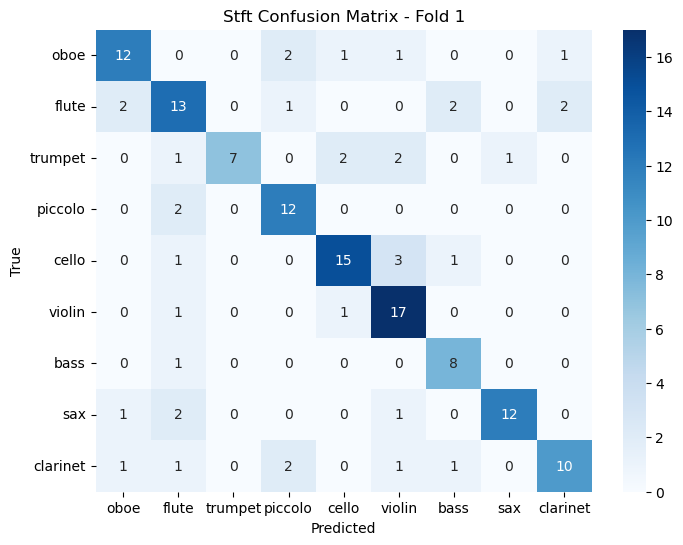

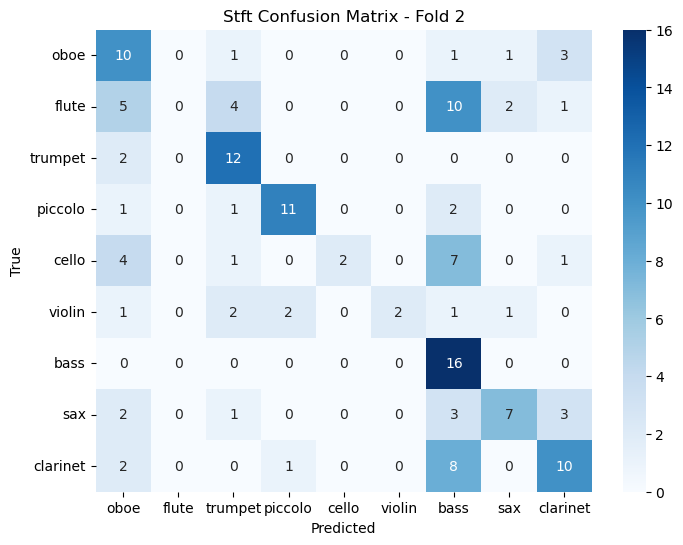

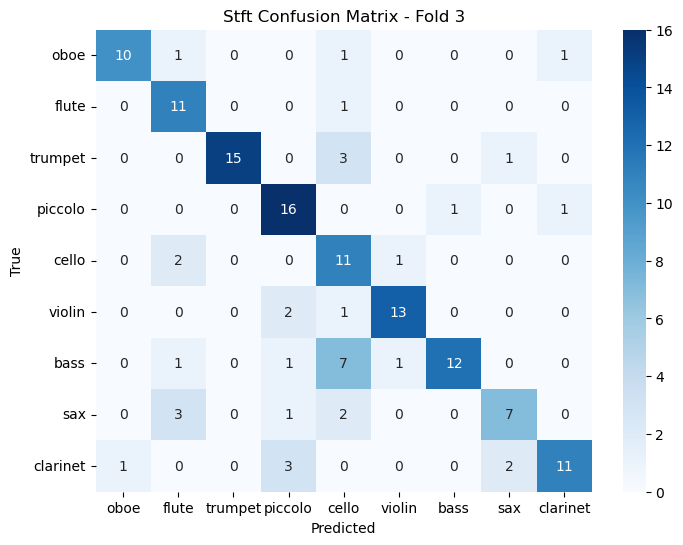

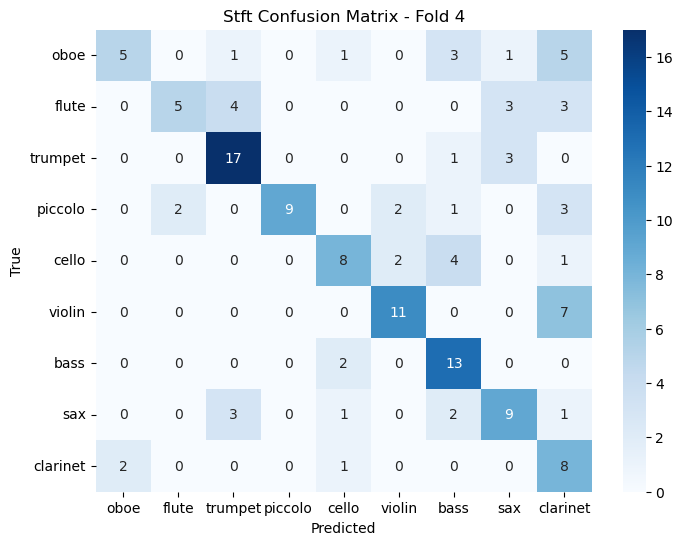

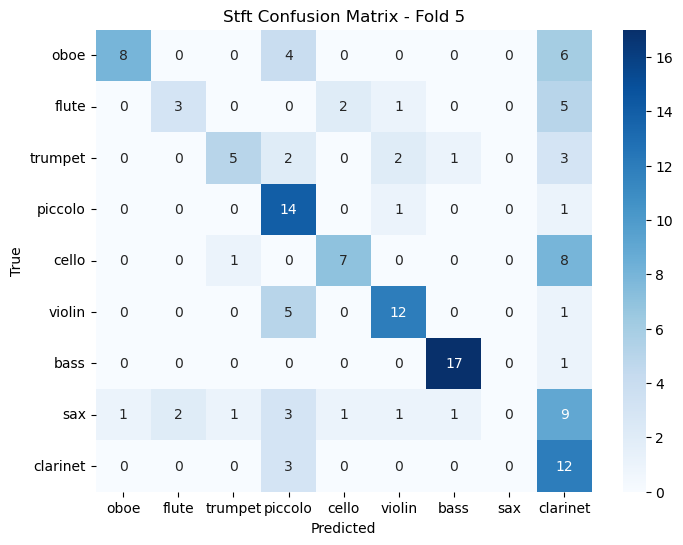


Harmonic Percussive Model
Accuracies: [0.8125, 0.8055555820465088, 0.7847222089767456, 0.8125, 0.7916666865348816]
Mean: 0.8014, Std: 0.0113, Min: 0.7847, Max: 0.8125


precision    recall  f1-score   support
oboe           0.875000  0.823529  0.848485   17.0000
flute          0.850000  0.850000  0.850000   20.0000
trumpet        0.900000  0.692308  0.782609   13.0000
piccolo        1.000000  0.785714  0.880000   14.0000
cello          0.730769  0.950000  0.826087   20.0000
violin         0.863636  1.000000  0.926829   19.0000
bass           0.800000  0.888889  0.842105    9.0000
sax            1.000000  0.375000  0.545455   16.0000
clarinet       0.608696  0.875000  0.717949   16.0000
accuracy       0.812500  0.812500  0.812500    0.8125
macro avg      0.847567  0.804493  0.802169  144.0000
weighted avg   0.844018  0.812500  0.804466  144.0000

precision    recall  f1-score     support
oboe           0.812500  0.812500  0.812500   16.000000
flute          1.000000  0.727273  0.842105   22.000000
trumpet        0.928571  0.928571  0.928571   14.000000
piccolo        0.560000  0.933333  0.700000   15.000000
cello          0.800000  0.533333  0.640000   15.000000
violin         0.750000  1.000000  0.857143    9.000000
bass           0.888889  1.000000  0.941176   16.000000
sax            0.823529  0.875000  0.848485   16.000000
clarinet       0.812500  0.619048  0.702703   21.000000
accuracy       0.805556  0.805556  0.805556    0.805556
macro avg      0.819554  0.825451  0.808076  144.000000
weighted avg   0.830633  0.805556  0.803694  144.000000

precision    recall  f1-score     support
oboe           0.857143  0.923077  0.888889   13.000000
flute          0.833333  0.833333  0.833333   12.000000
trumpet        0.812500  0.684211  0.742857   19.000000
piccolo        1.000000  0.722222  0.838710   18.000000
cello          0.866667  0.928571  0.896552   14.000000
violin         0.516129  1.000000  0.680851   16.000000
bass           0.941176  0.727273  0.820513   22.000000
sax            0.833333  0.384615  0.526316   13.000000
clarinet       0.750000  0.882353  0.810811   17.000000
accuracy       0.784722  0.784722  0.784722    0.784722
macro avg      0.823365  0.787295  0.782092  144.000000
weighted avg   0.828201  0.784722  0.783952  144.000000

precision    recall  f1-score   support
oboe           0.818182  0.562500  0.666667   16.0000
flute          0.823529  0.933333  0.875000   15.0000
trumpet        0.950000  0.904762  0.926829   21.0000
piccolo        0.739130  1.000000  0.850000   17.0000
cello          0.705882  0.800000  0.750000   15.0000
violin         0.666667  1.000000  0.800000   18.0000
bass           1.000000  0.666667  0.800000   15.0000
sax            1.000000  0.562500  0.720000   16.0000
clarinet       0.900000  0.818182  0.857143   11.0000
accuracy       0.812500  0.812500  0.812500    0.8125
macro avg      0.844821  0.805327  0.805071  144.0000
weighted avg   0.843384  0.812500  0.807664  144.0000

precision    recall  f1-score     support
oboe           0.764706  0.722222  0.742857   18.000000
flute          1.000000  0.727273  0.842105   11.000000
trumpet        0.800000  0.923077  0.857143   13.000000
piccolo        0.933333  0.875000  0.903226   16.000000
cello          0.625000  0.937500  0.750000   16.000000
violin         0.833333  0.833333  0.833333   18.000000
bass           0.850000  0.944444  0.894737   18.000000
sax            0.916667  0.578947  0.709677   19.000000
clarinet       0.600000  0.600000  0.600000   15.000000
accuracy       0.791667  0.791667  0.791667    0.791667
macro avg      0.813671  0.793533  0.792564  144.000000
weighted avg   0.811213  0.791667  0.790404  144.000000

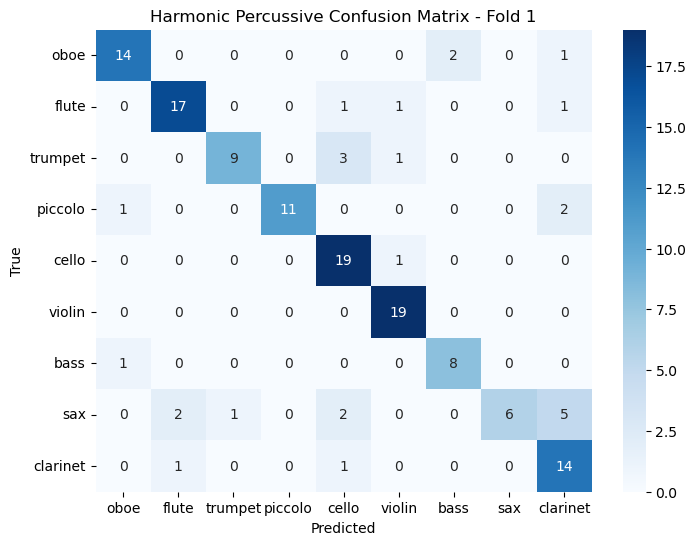

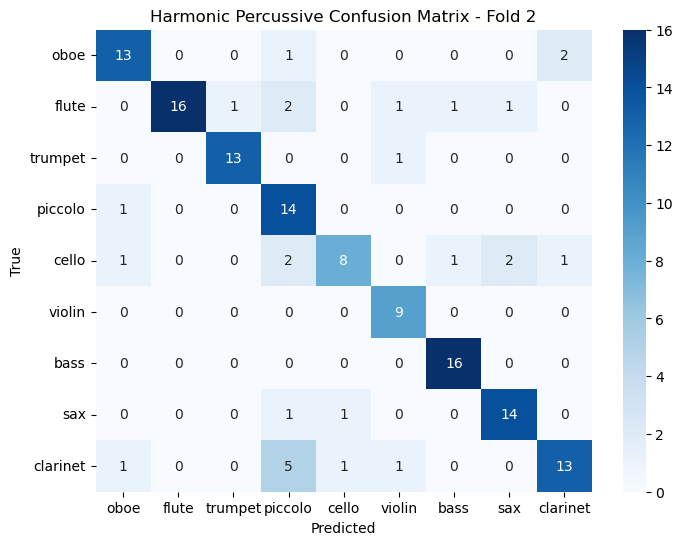

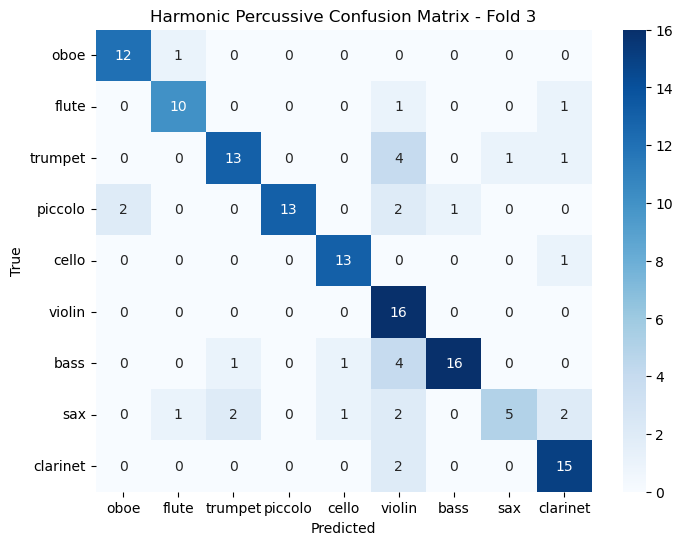

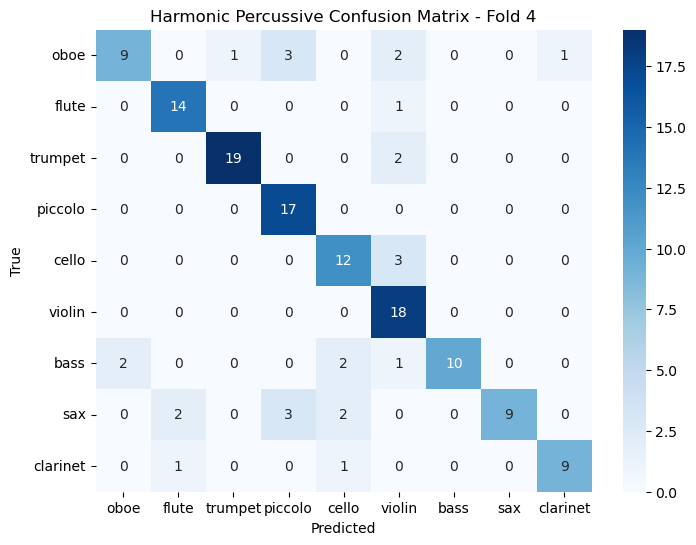

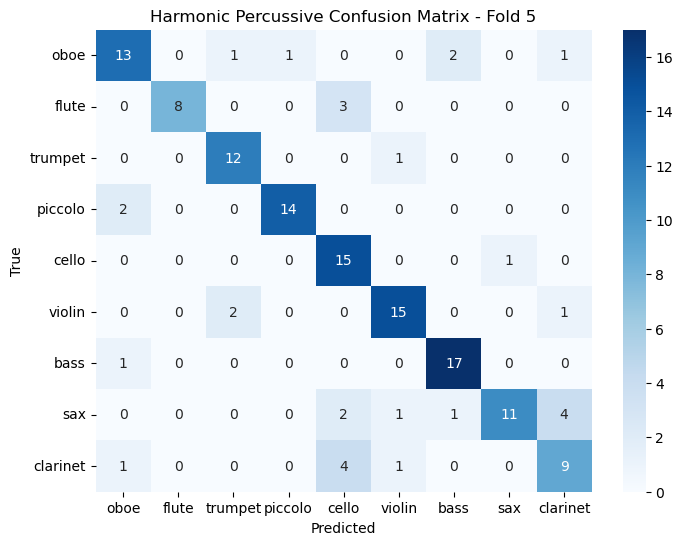


Onset Strength Model
Accuracies: [0.2430555522441864, 0.1388888955116272, 0.25, 0.1666666716337204, 0.1805555522441864]
Mean: 0.1958, Std: 0.0436, Min: 0.1389, Max: 0.2500


precision    recall  f1-score     support
oboe           0.285714  0.352941  0.315789   17.000000
flute          0.384615  0.250000  0.303030   20.000000
trumpet        0.000000  0.000000  0.000000   13.000000
piccolo        0.269231  0.500000  0.350000   14.000000
cello          0.500000  0.050000  0.090909   20.000000
violin         0.000000  0.000000  0.000000   19.000000
bass           0.571429  0.444444  0.500000    9.000000
sax            0.138462  0.562500  0.222222   16.000000
clarinet       0.300000  0.187500  0.230769   16.000000
accuracy       0.243056  0.243056  0.243056    0.243056
macro avg      0.272161  0.260821  0.223636  144.000000
weighted avg   0.267201  0.243056  0.207605  144.000000

precision    recall  f1-score     support
oboe           0.066667  0.062500  0.064516   16.000000
flute          0.000000  0.000000  0.000000   22.000000
trumpet        0.263158  0.357143  0.303030   14.000000
piccolo        0.078947  0.400000  0.131868   15.000000
cello          0.000000  0.000000  0.000000   15.000000
violin         0.000000  0.000000  0.000000    9.000000
bass           1.000000  0.312500  0.476190   16.000000
sax            0.000000  0.000000  0.000000   16.000000
clarinet       0.214286  0.142857  0.171429   21.000000
accuracy       0.138889  0.138889  0.138889    0.138889
macro avg      0.180340  0.141667  0.127448  144.000000
weighted avg   0.183577  0.138889  0.128276  144.000000

precision    recall  f1-score  support
oboe           0.200000  0.076923  0.111111    13.00
flute          0.187500  0.250000  0.214286    12.00
trumpet        0.333333  0.210526  0.258065    19.00
piccolo        0.236842  0.500000  0.321429    18.00
cello          0.125000  0.071429  0.090909    14.00
violin         0.470588  0.500000  0.484848    16.00
bass           1.000000  0.181818  0.307692    22.00
sax            0.111111  0.153846  0.129032    13.00
clarinet       0.153846  0.235294  0.186047    17.00
accuracy       0.250000  0.250000  0.250000     0.25
macro avg      0.313136  0.242204  0.233713   144.00
weighted avg   0.352679  0.250000  0.245448   144.00

precision    recall  f1-score     support
oboe           0.166667  0.062500  0.090909   16.000000
flute          0.000000  0.000000  0.000000   15.000000
trumpet        0.666667  0.095238  0.166667   21.000000
piccolo        0.333333  0.058824  0.100000   17.000000
cello          0.000000  0.000000  0.000000   15.000000
violin         1.000000  0.055556  0.105263   18.000000
bass           1.000000  0.333333  0.500000   15.000000
sax            0.125000  0.312500  0.178571   16.000000
clarinet       0.107143  0.818182  0.189474   11.000000
accuracy       0.166667  0.166667  0.166667    0.166667
macro avg      0.377646  0.192904  0.147876  144.000000
weighted avg   0.406333  0.166667  0.145768  144.000000

precision    recall  f1-score     support
oboe           0.352941  0.333333  0.342857   18.000000
flute          0.076923  0.090909  0.083333   11.000000
trumpet        0.200000  0.076923  0.111111   13.000000
piccolo        0.090909  0.062500  0.074074   16.000000
cello          0.000000  0.000000  0.000000   16.000000
violin         0.000000  0.000000  0.000000   18.000000
bass           1.000000  0.166667  0.285714   18.000000
sax            0.250000  0.105263  0.148148   19.000000
clarinet       0.139535  0.800000  0.237624   15.000000
accuracy       0.180556  0.180556  0.180556    0.180556
macro avg      0.234479  0.181733  0.142540  144.000000
weighted avg   0.250671  0.180556  0.147498  144.000000

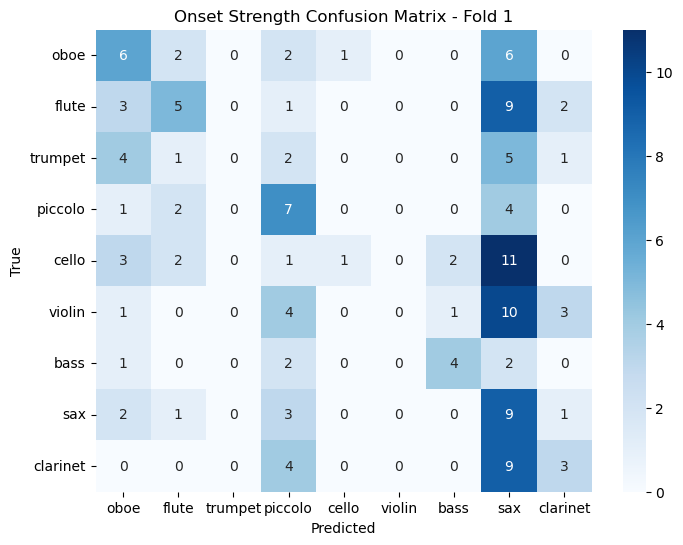

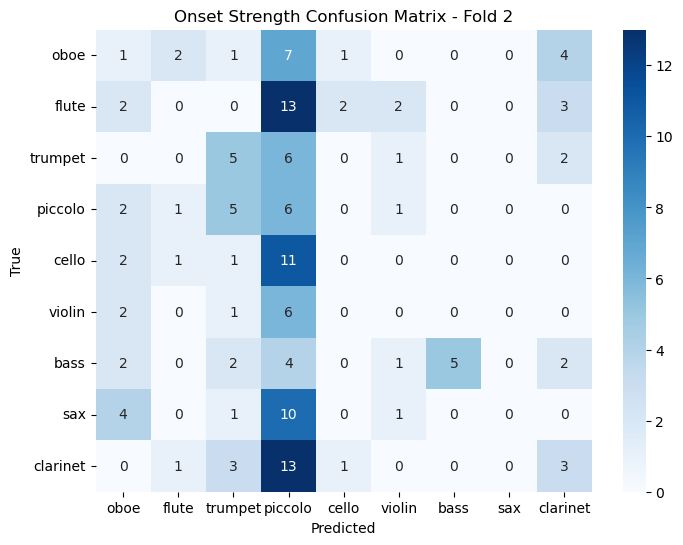

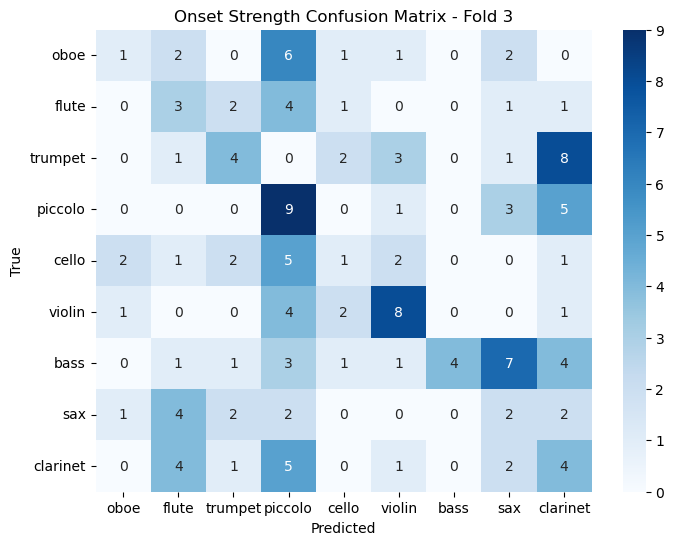

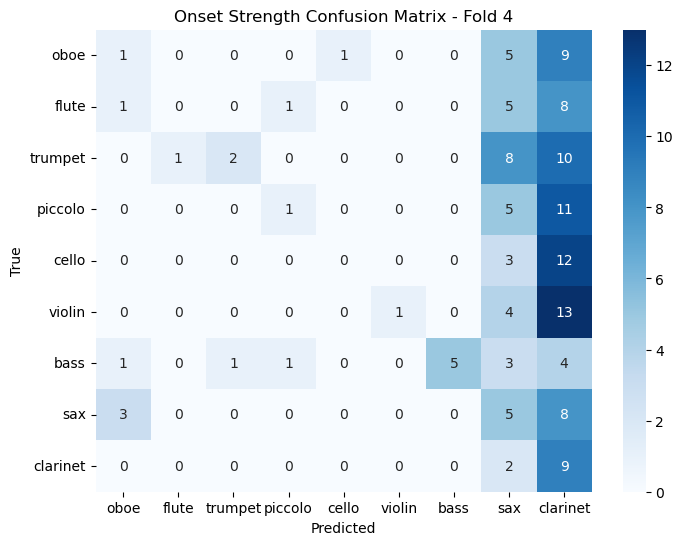

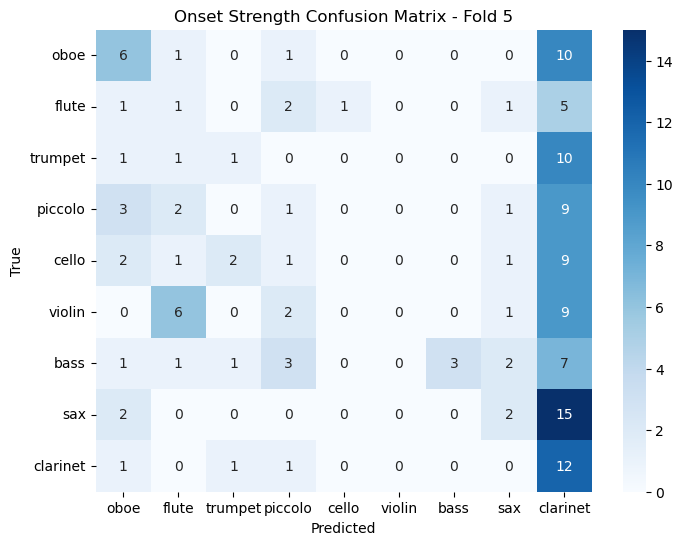

In [9]:
# Show detailed results for each feature type
for feature_type, results in individual_results.items():
    print(f"\n{'='*40}")
    print(f"{feature_type.replace('_', ' ').title()} Model")
    print(f"{'='*40}")
    accs = results['accuracy_list']
    print(f"Accuracies: {accs}")
    print(f"Mean: {np.mean(accs):.4f}, Std: {np.std(accs):.4f}, Min: {np.min(accs):.4f}, Max: {np.max(accs):.4f}")

    # Classification reports
    for i, report in enumerate(results['classification_reports']):
        df = pd.DataFrame(report).transpose()
        df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
        display(df)

    # Confusion matrices
    for i, conf_matrix in enumerate(results['confusion_matrices']):
        plt.figure(figsize=(8, 6))
        sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f"{feature_type.replace('_', ' ').title()} Confusion Matrix - Fold {i+1}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

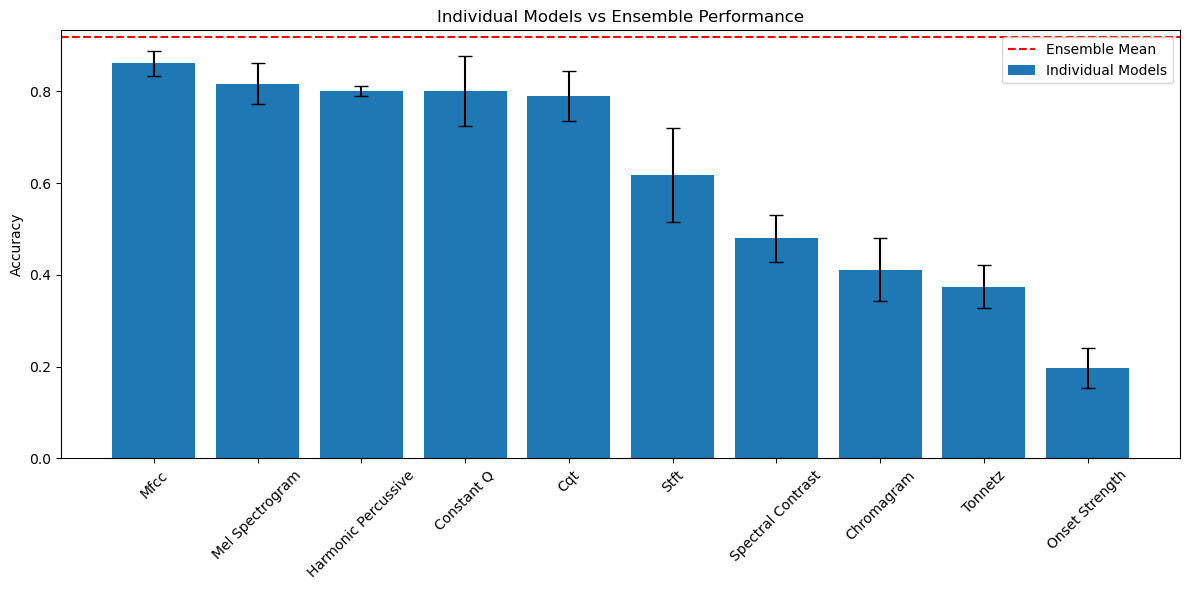

In [10]:
# Visual comparison of individual vs ensemble performance
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Feature Type'], performance_df['Mean Accuracy'], yerr=performance_df['Std Accuracy'], capsize=5, label='Individual Models')
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Individual Models vs Ensemble Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Mel Spectrogram Training History


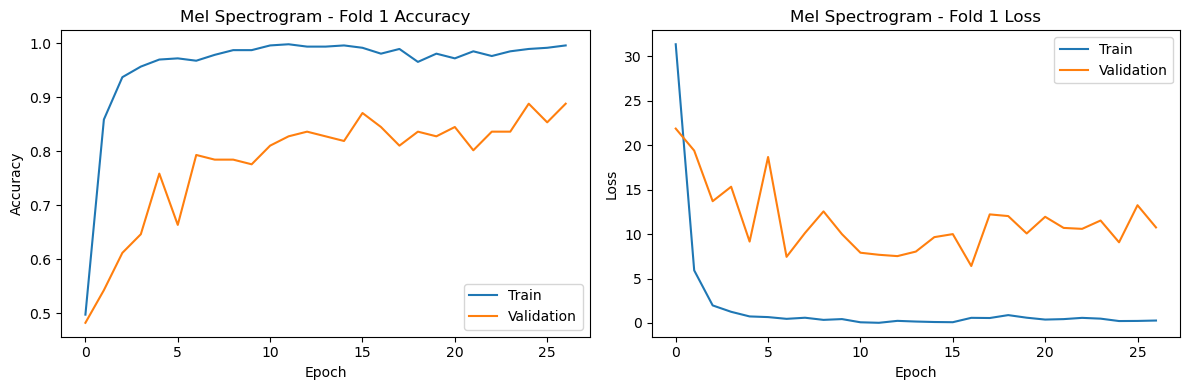

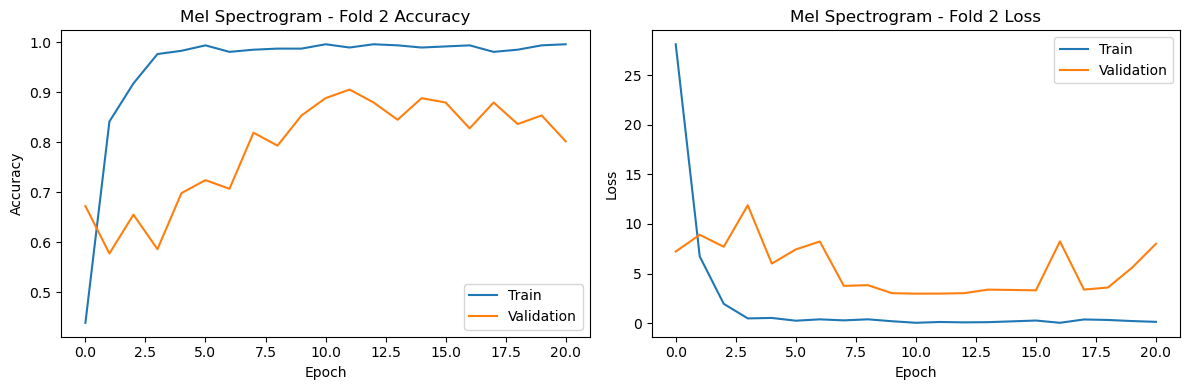

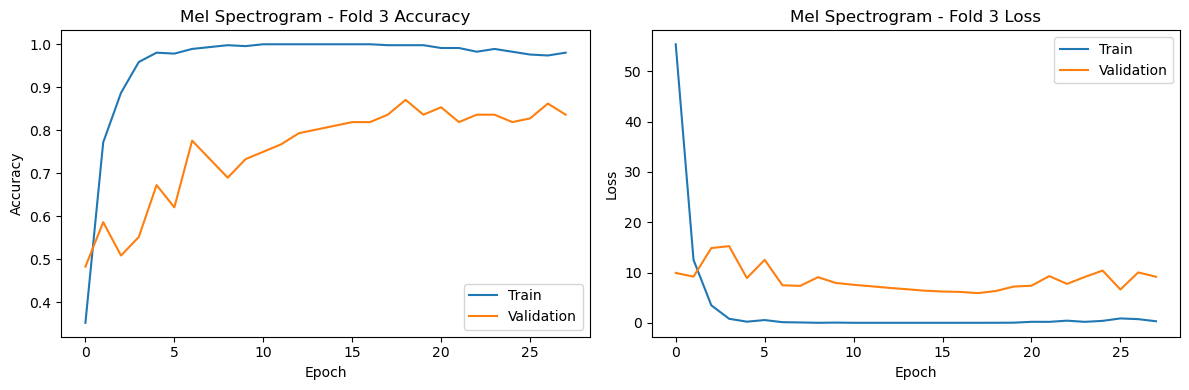

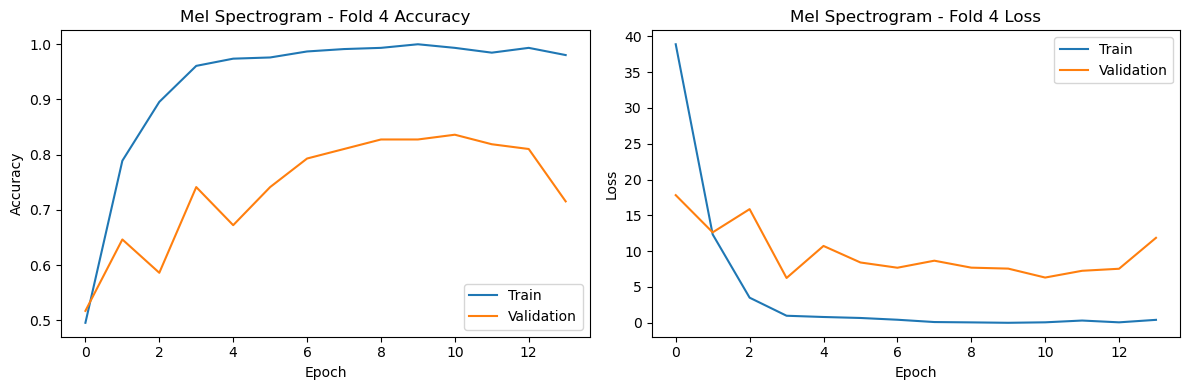

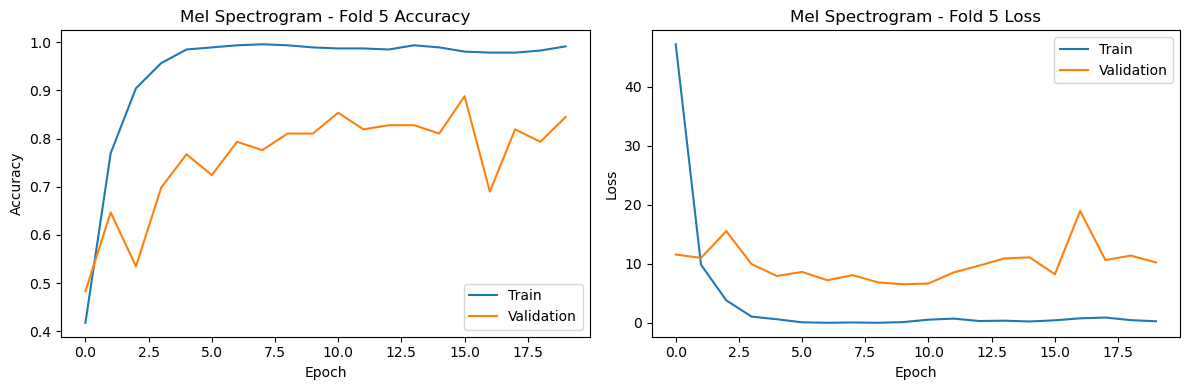


Mfcc Training History


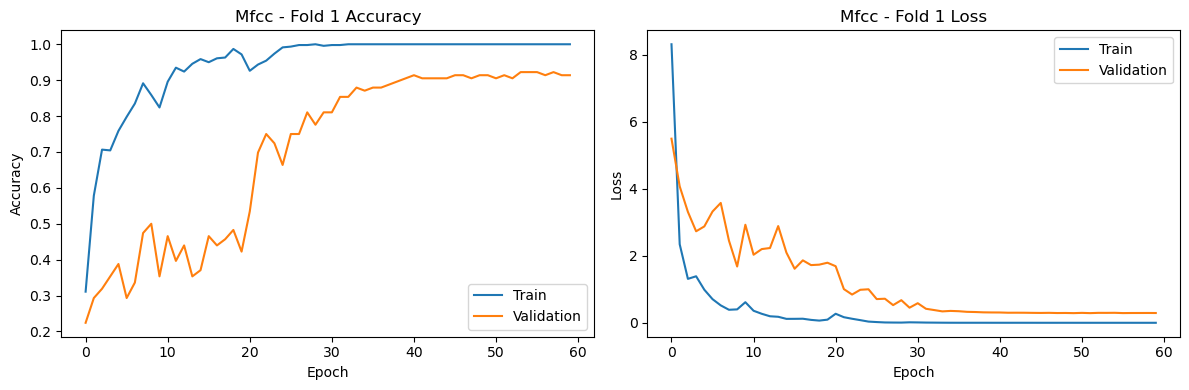

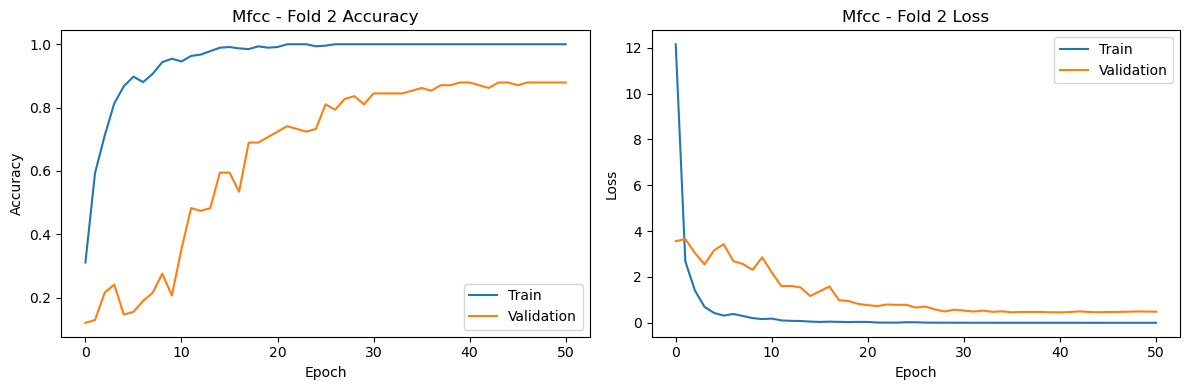

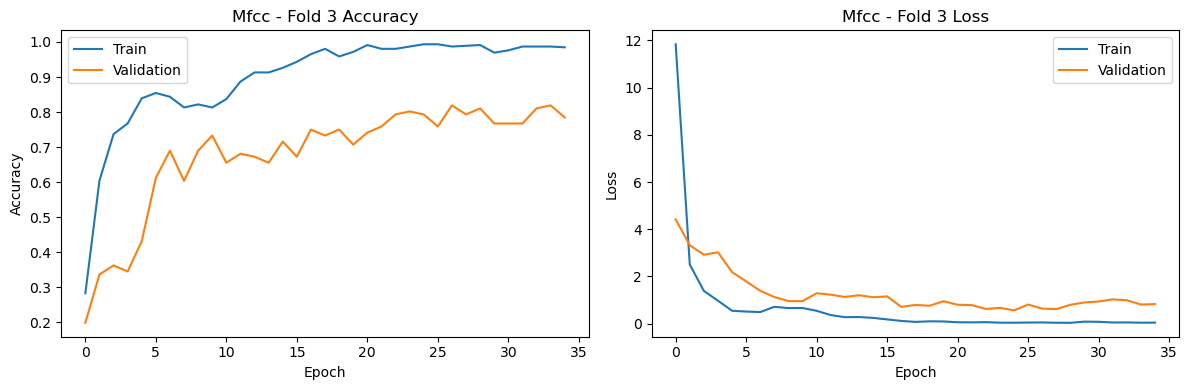

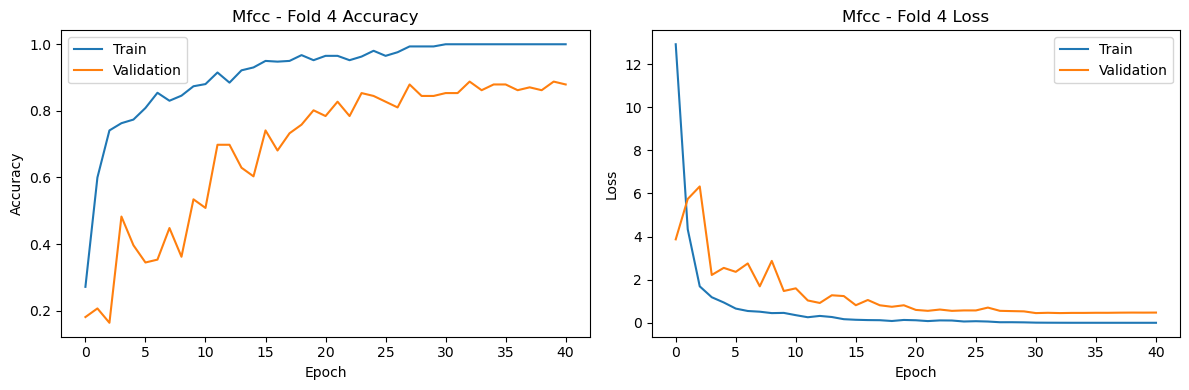

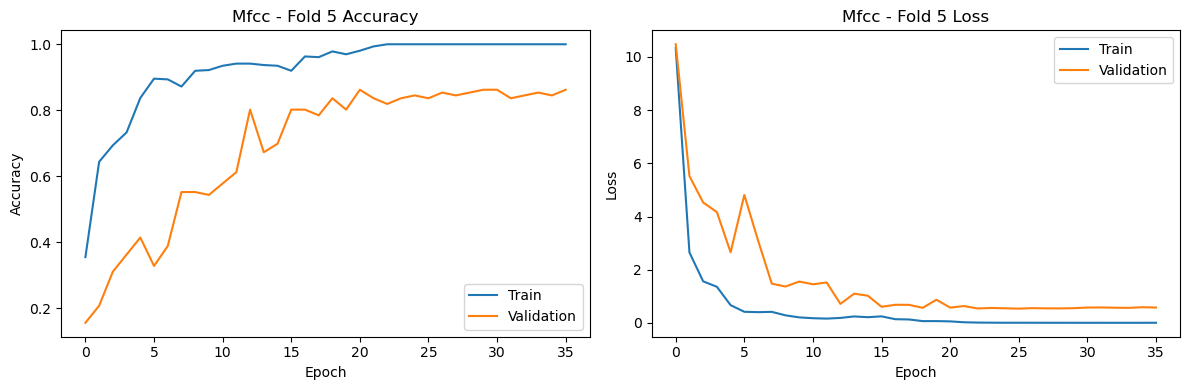


Chromagram Training History


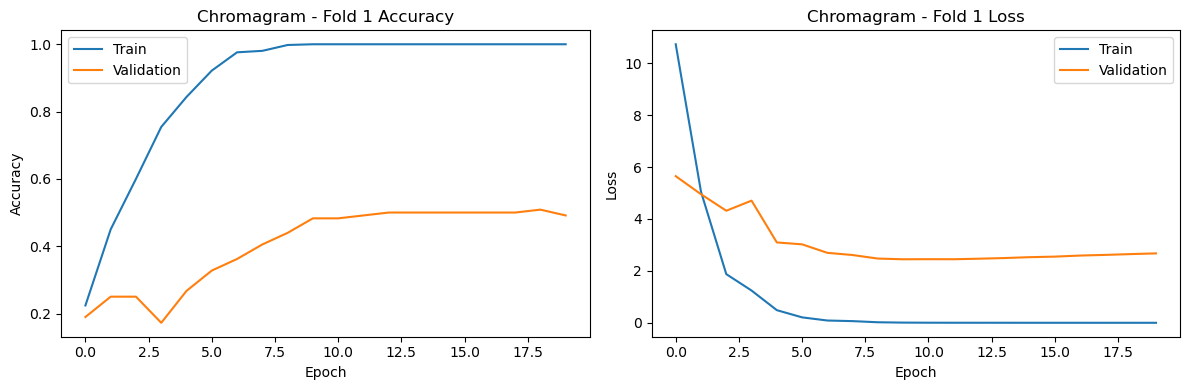

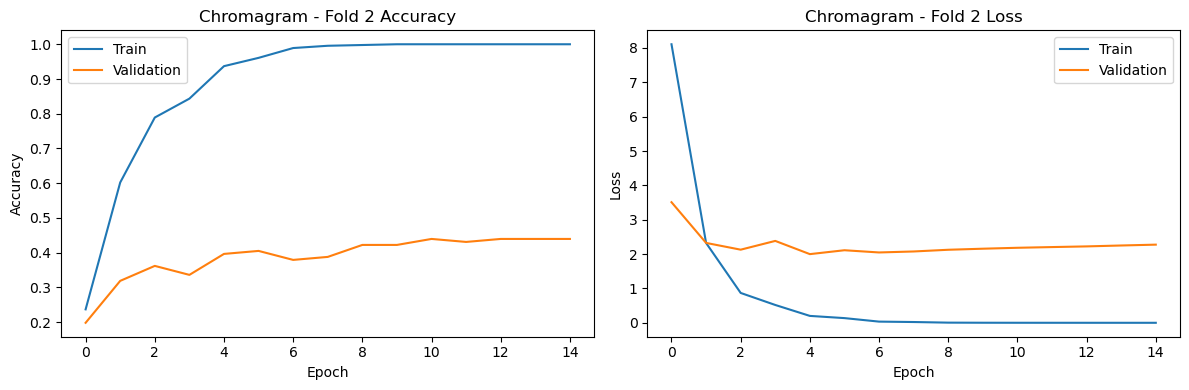

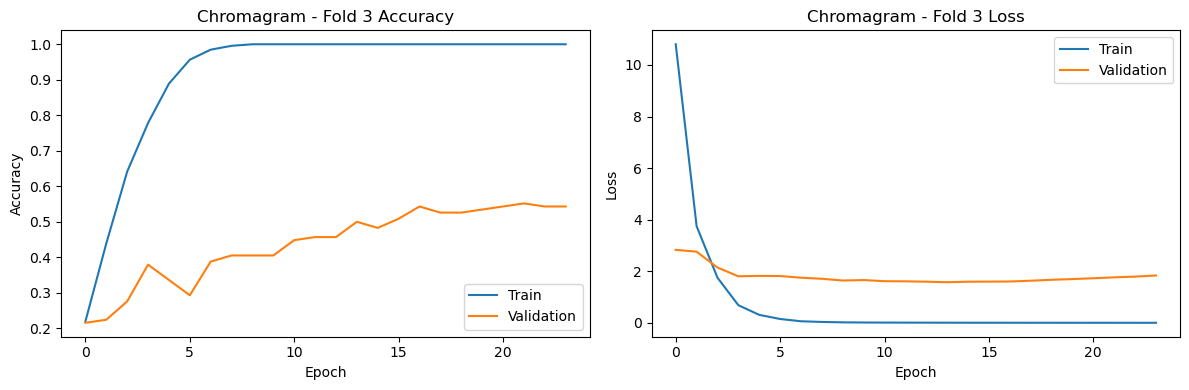

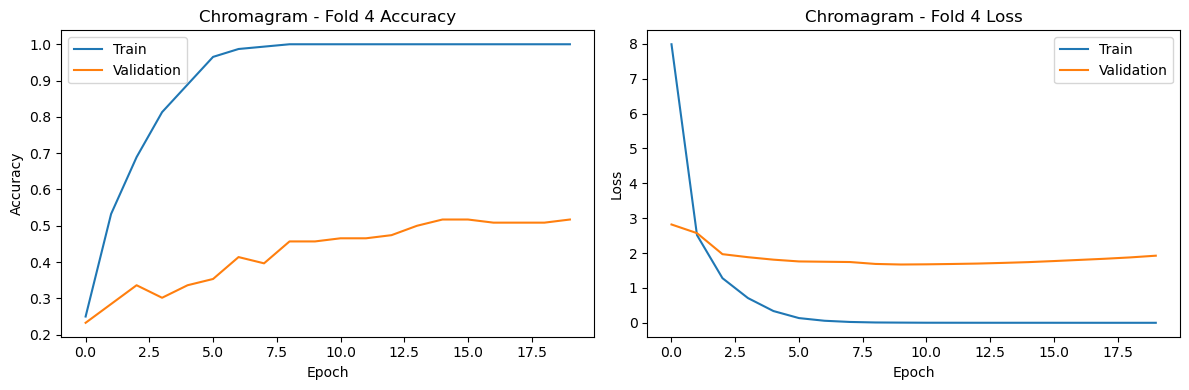

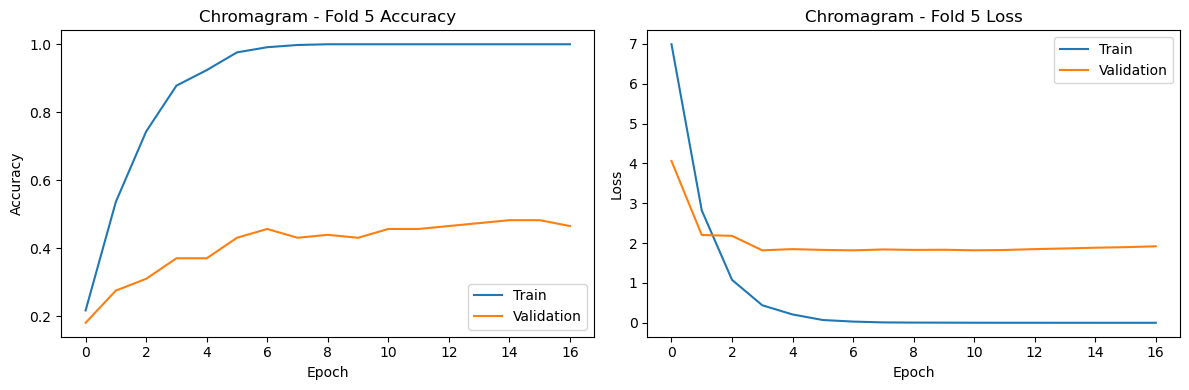


Spectral Contrast Training History


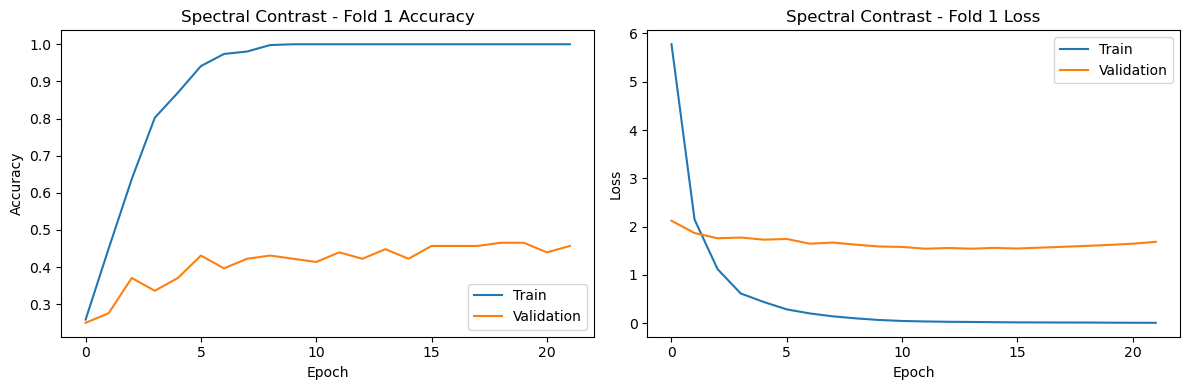

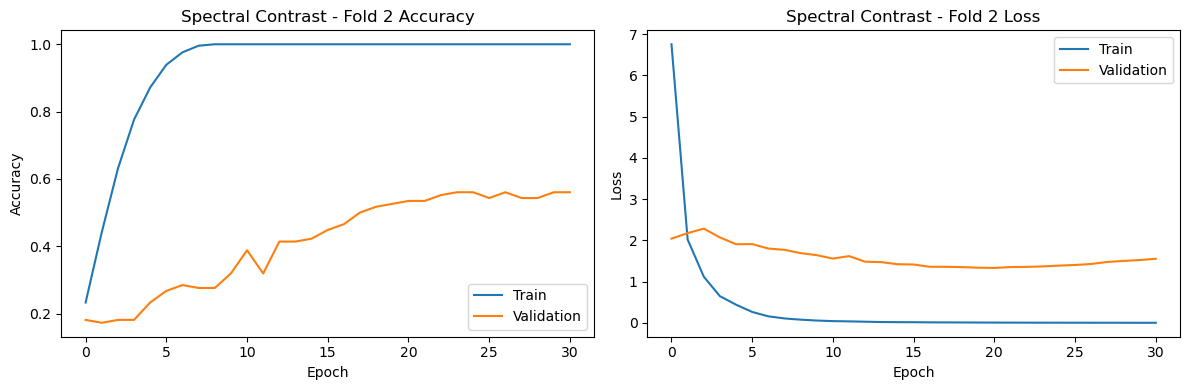

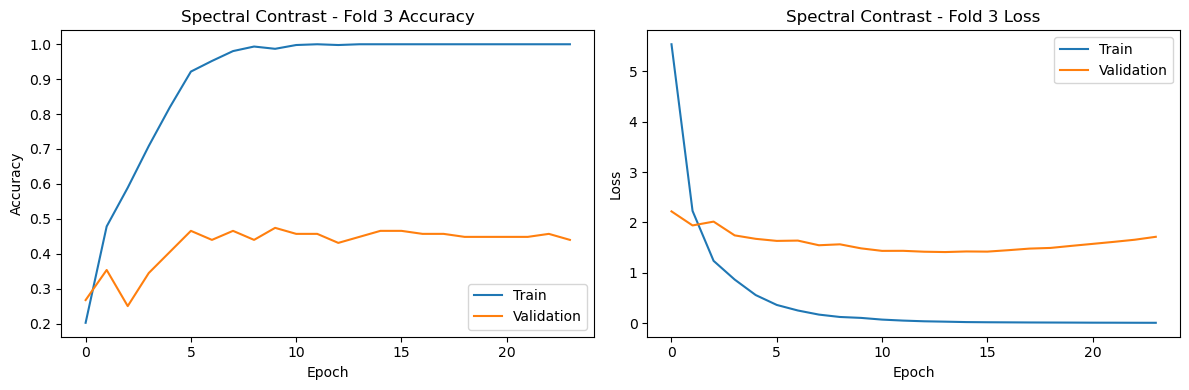

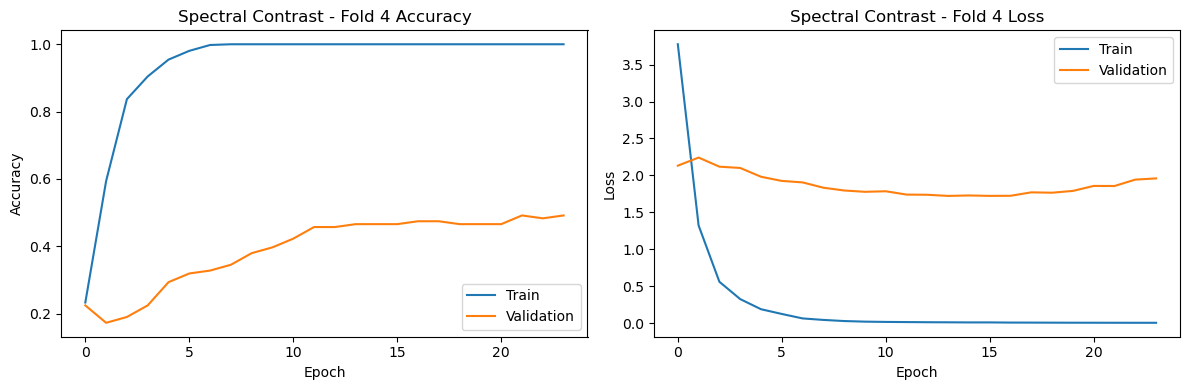

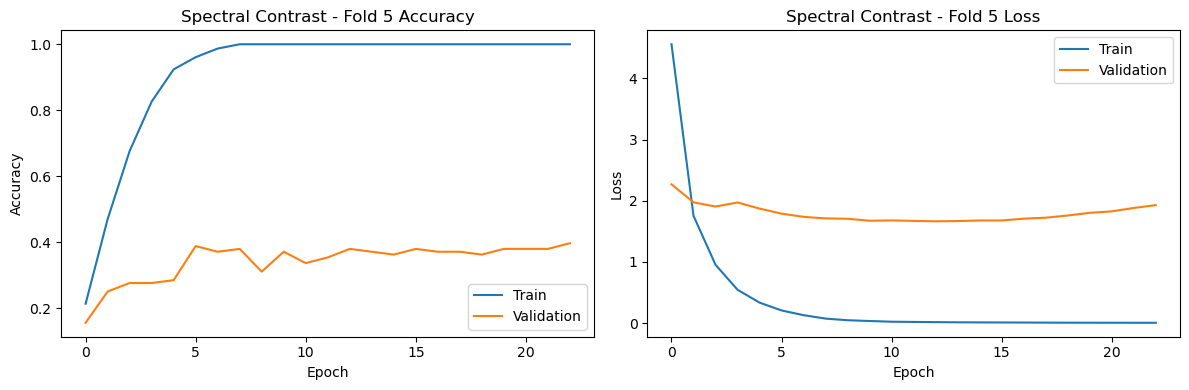


Tonnetz Training History


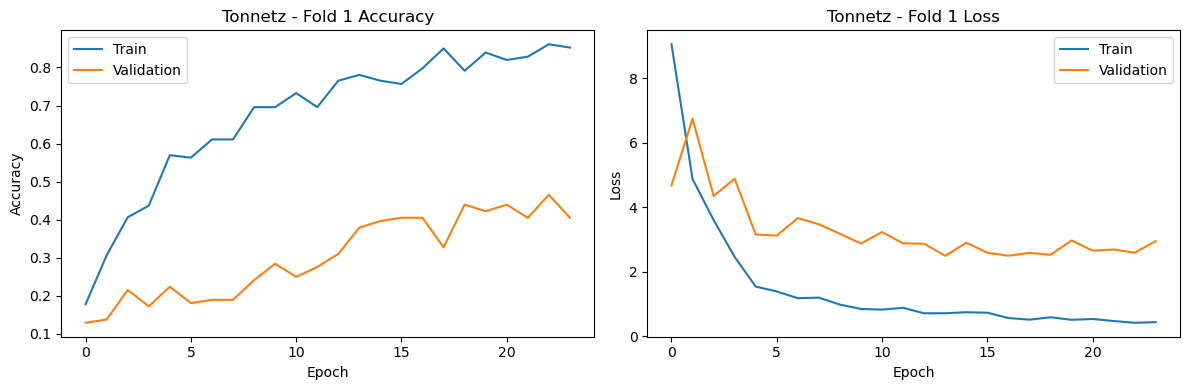

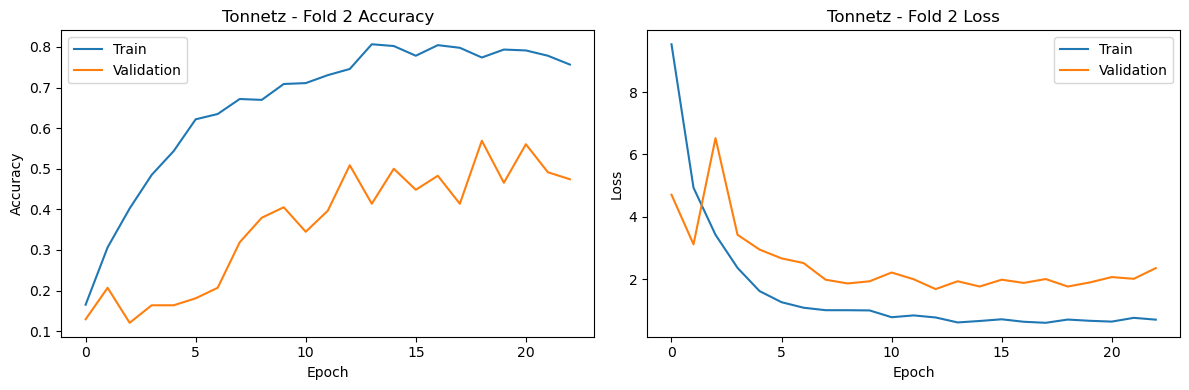

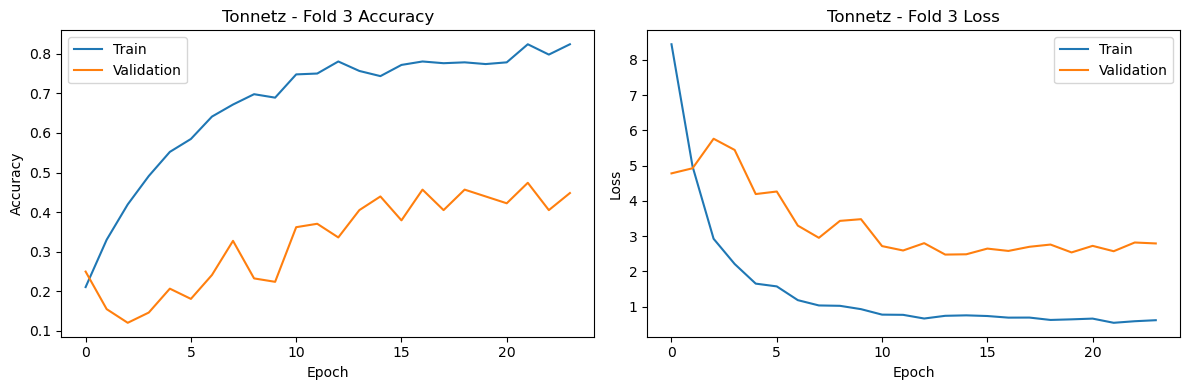

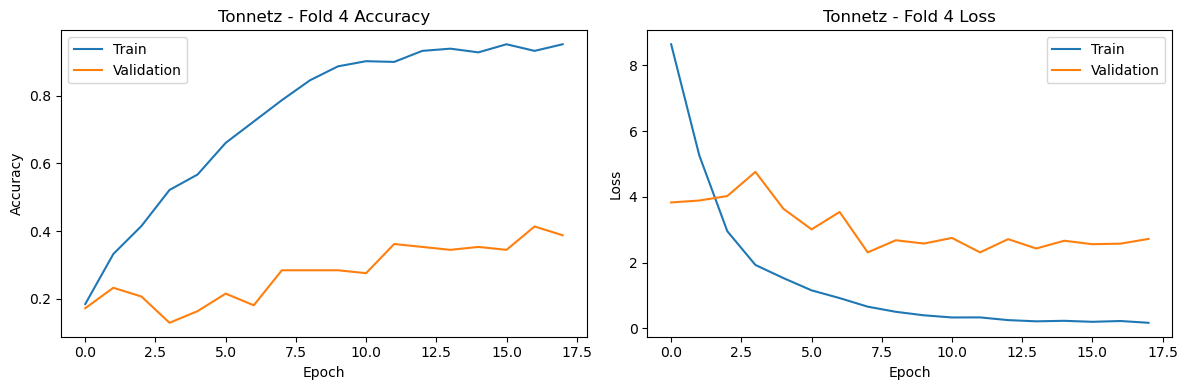

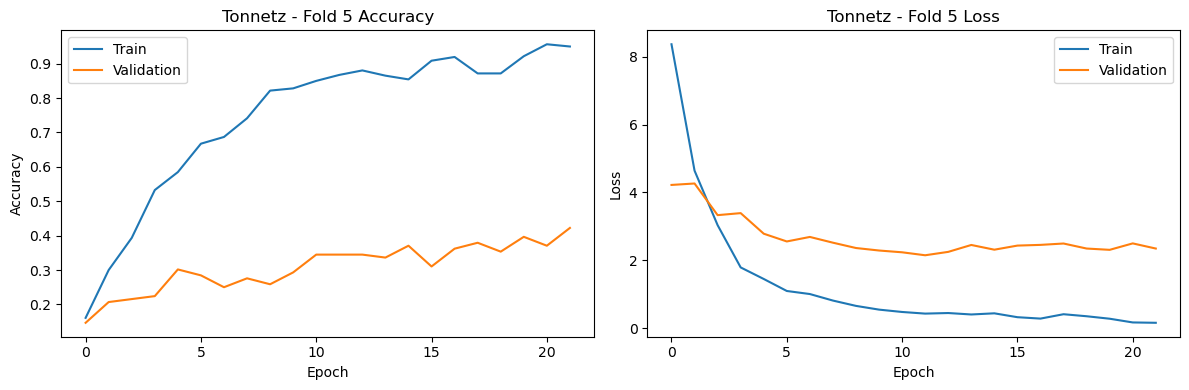


Constant Q Training History


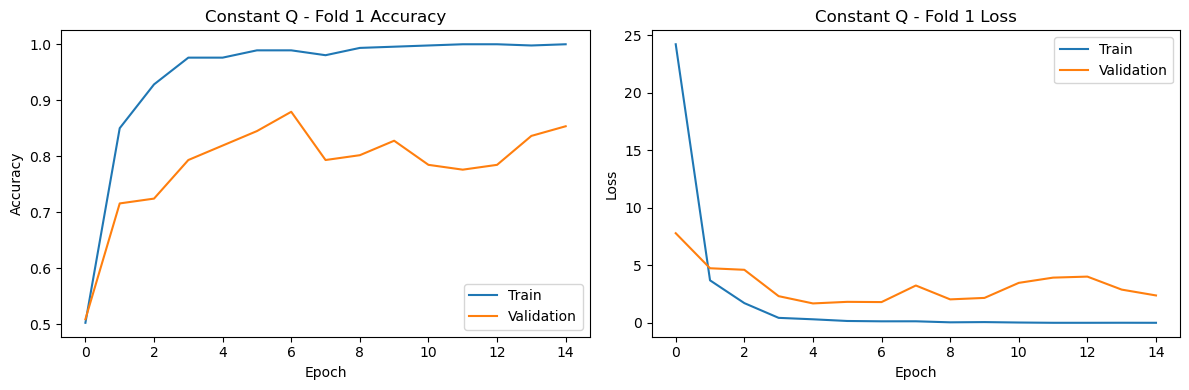

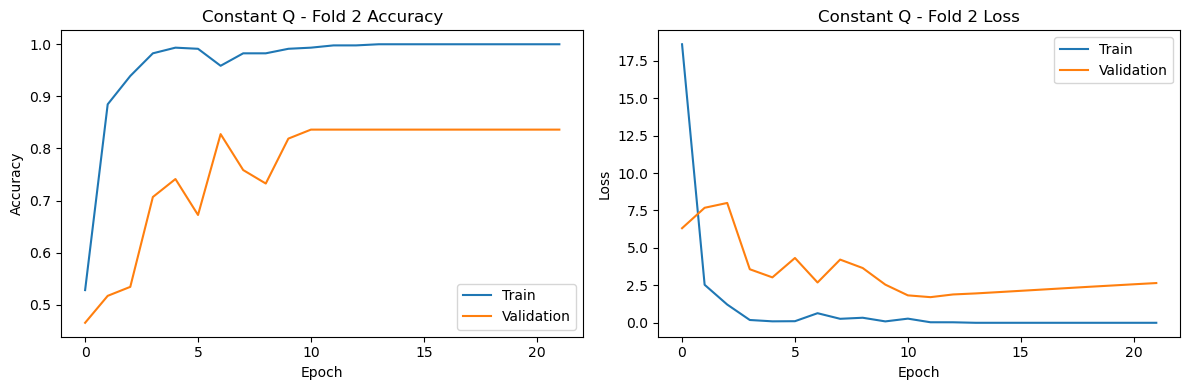

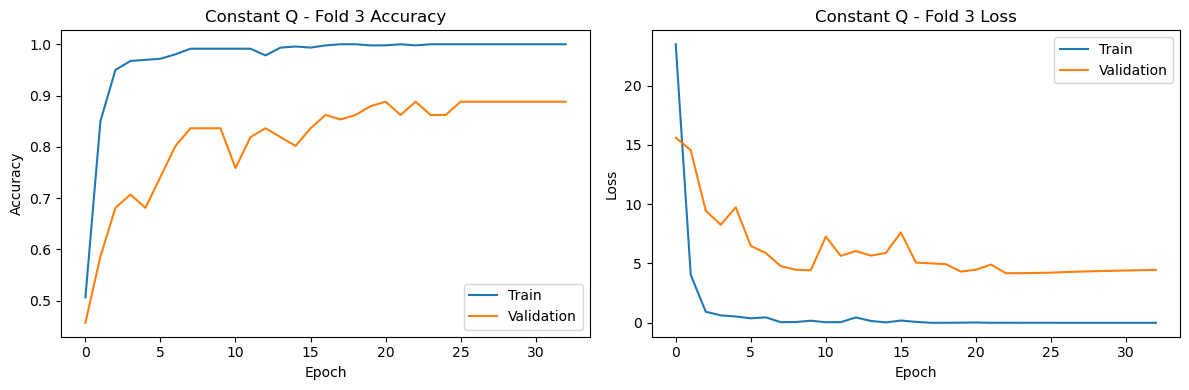

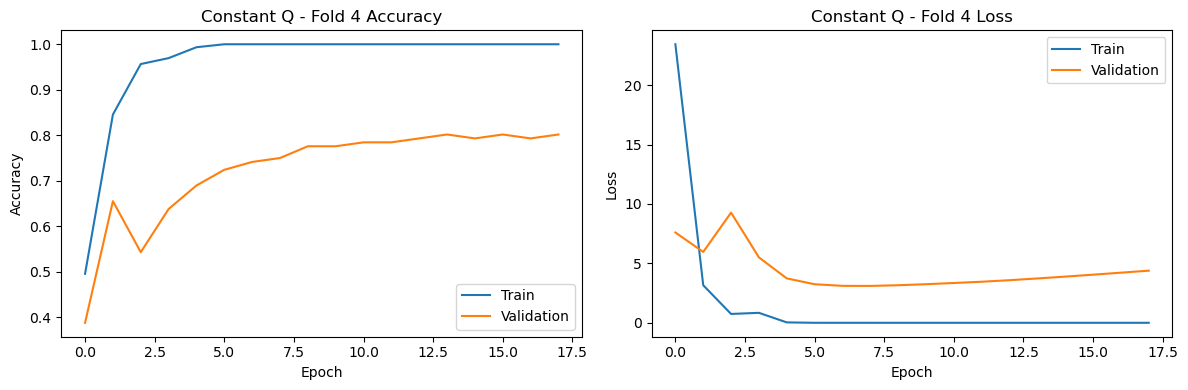

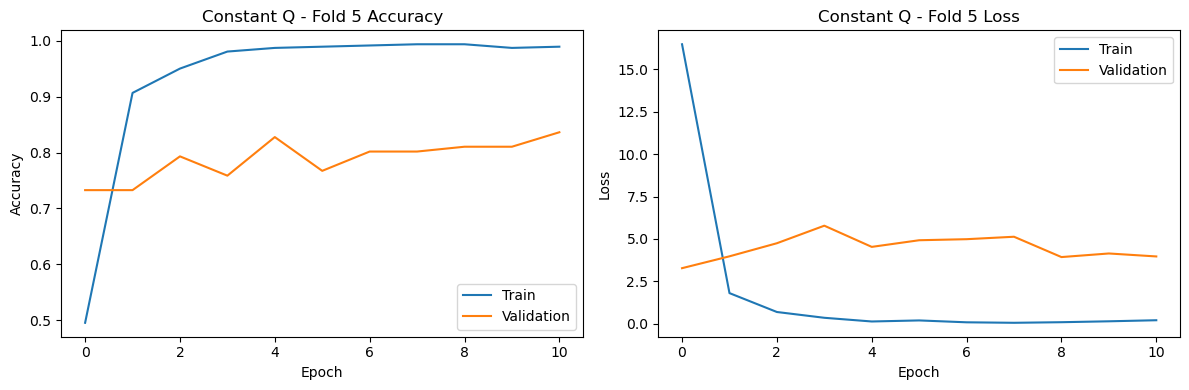


Cqt Training History


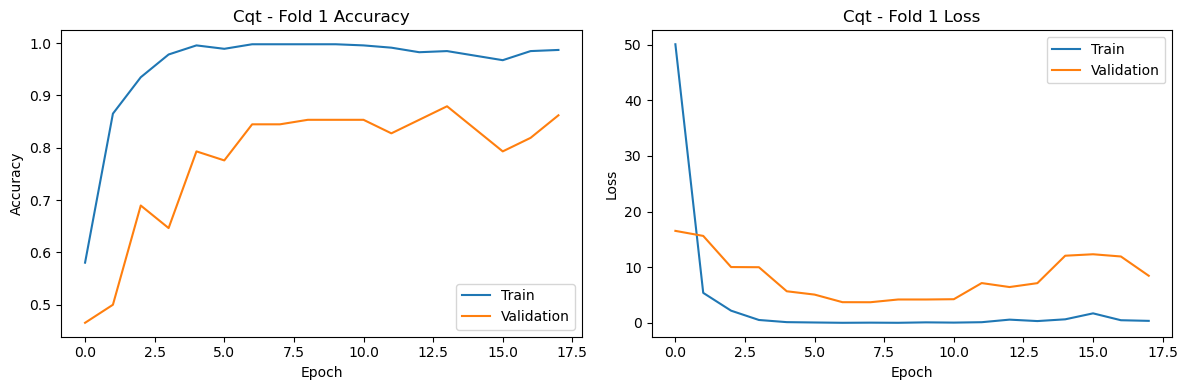

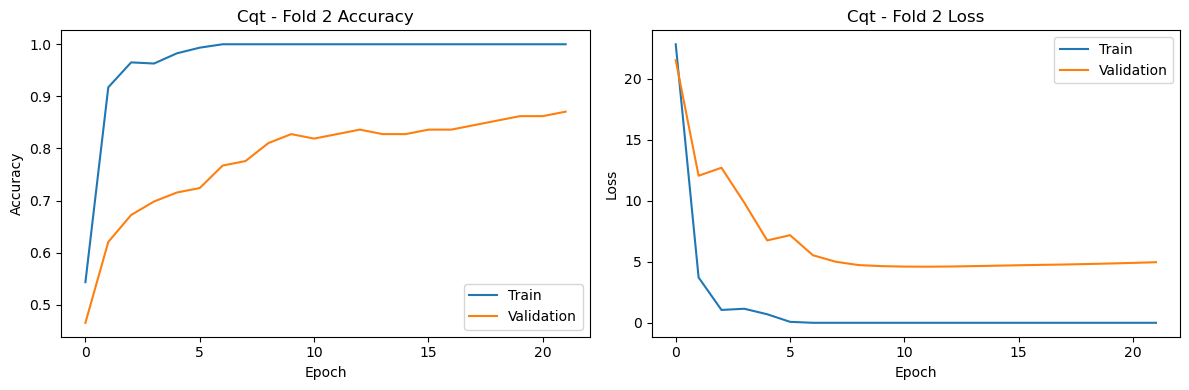

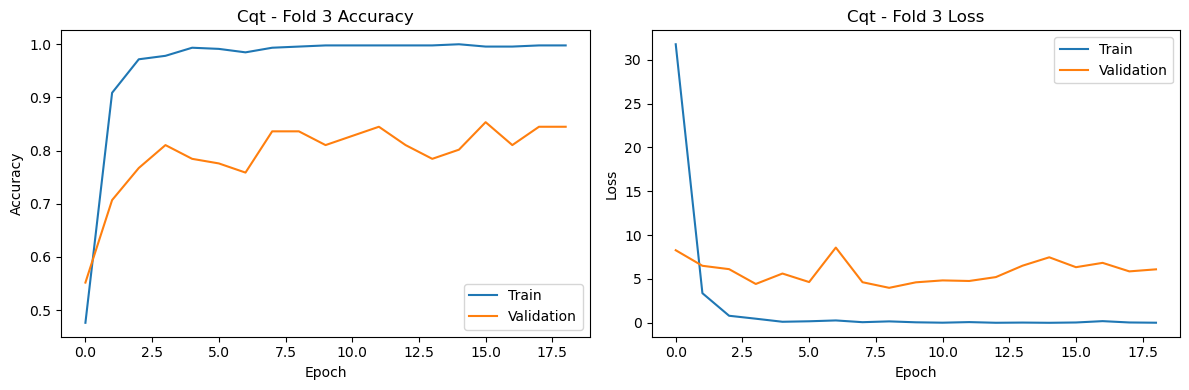

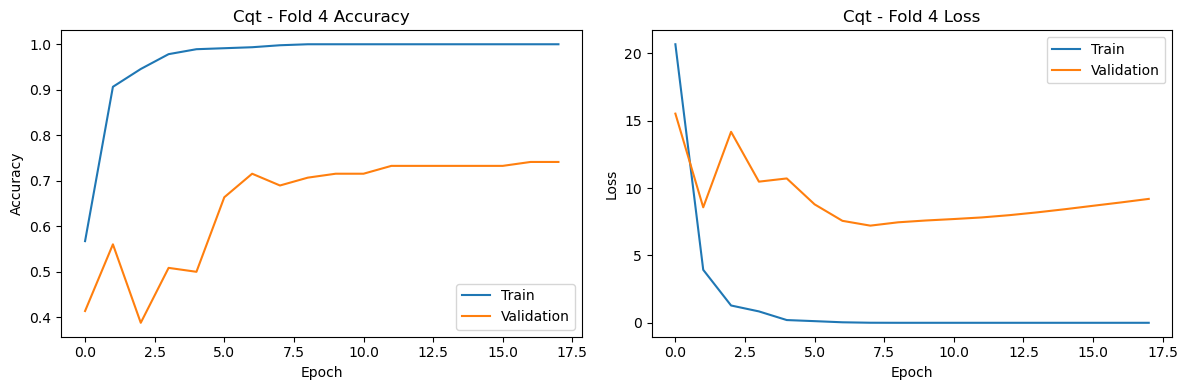

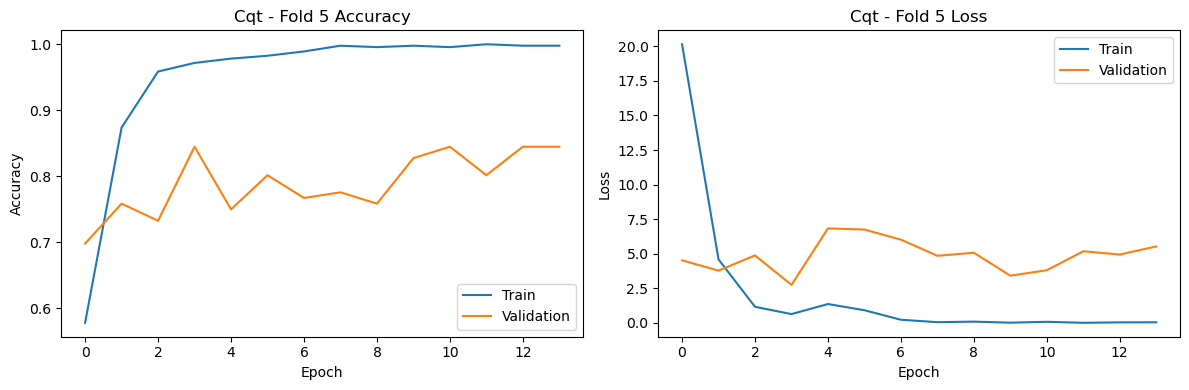


Stft Training History


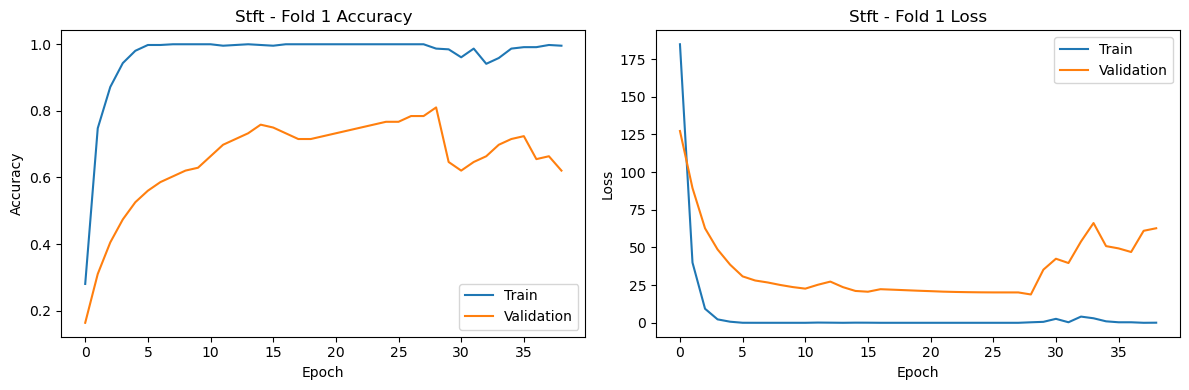

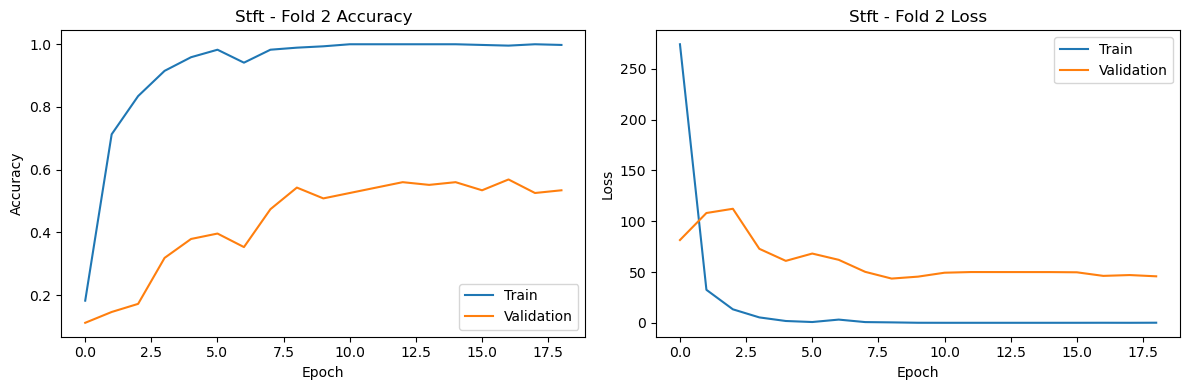

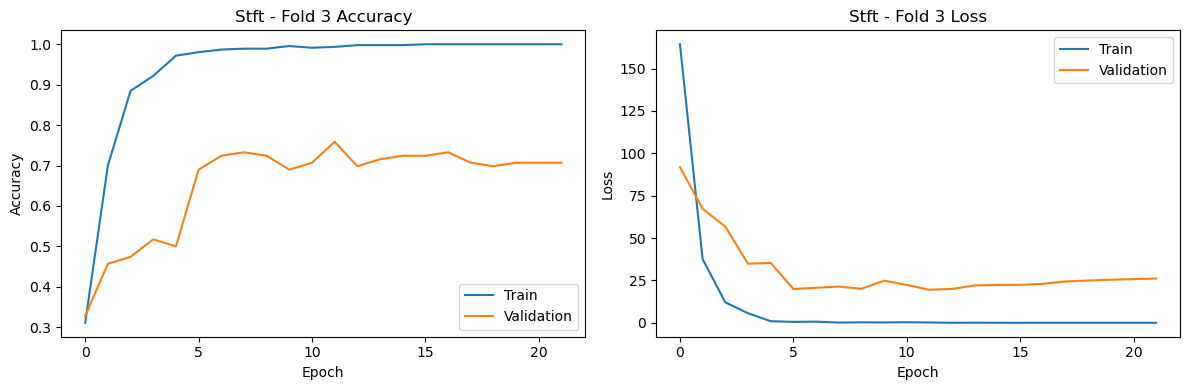

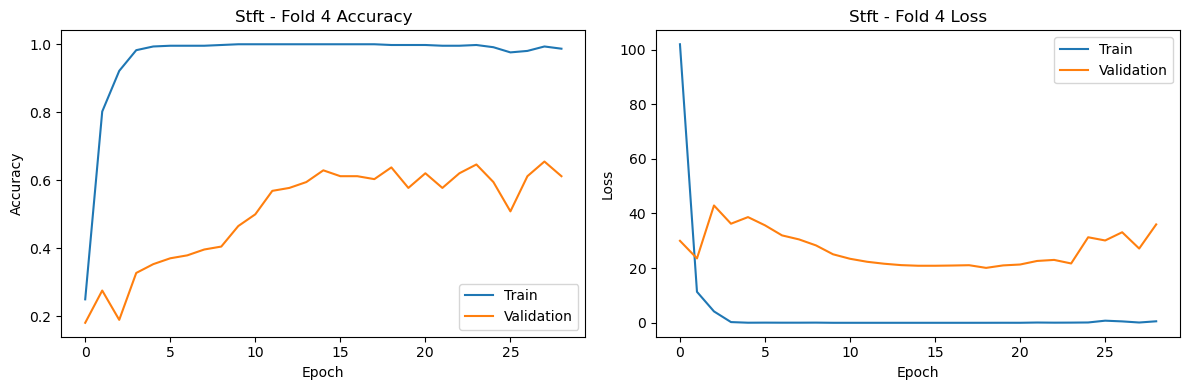

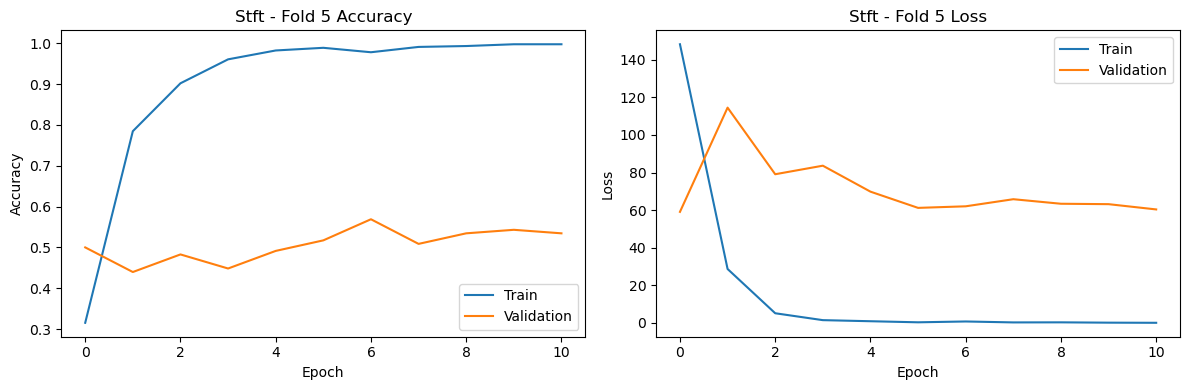


Harmonic Percussive Training History


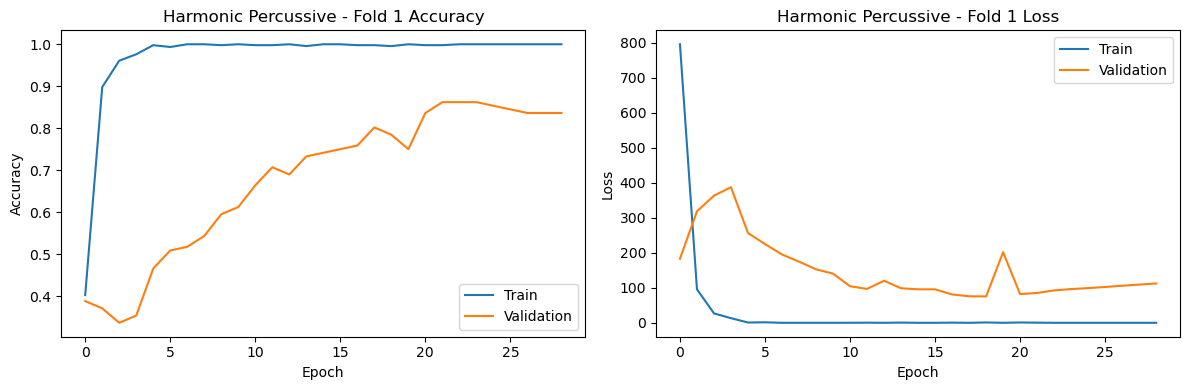

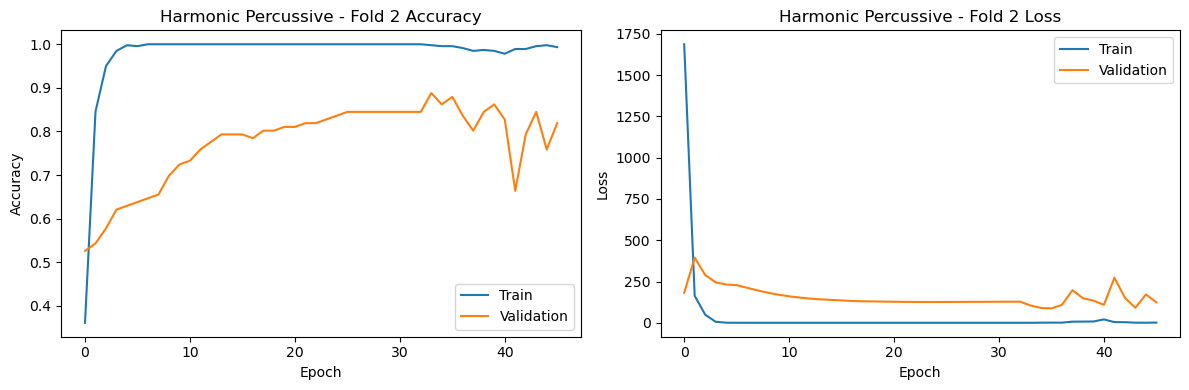

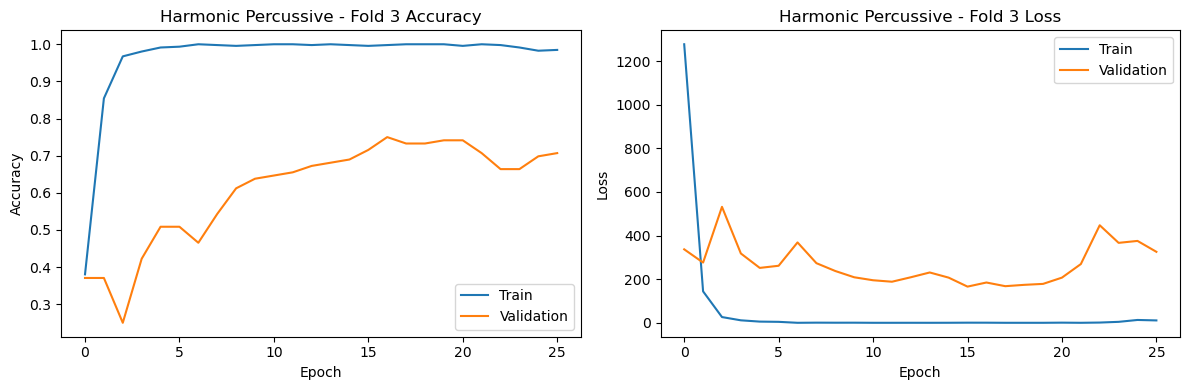

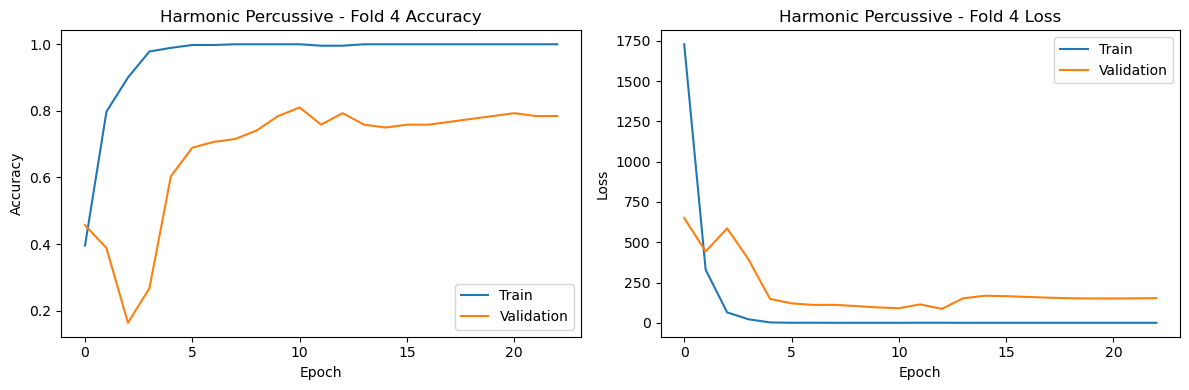

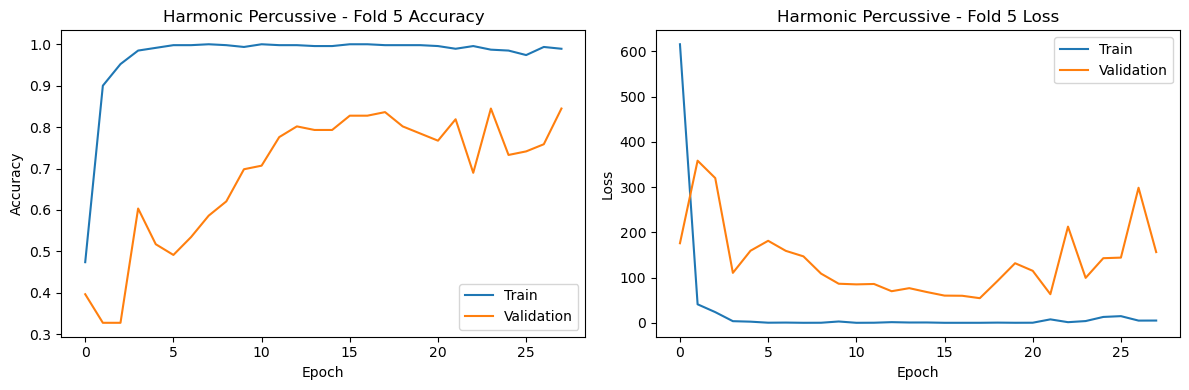


Onset Strength Training History


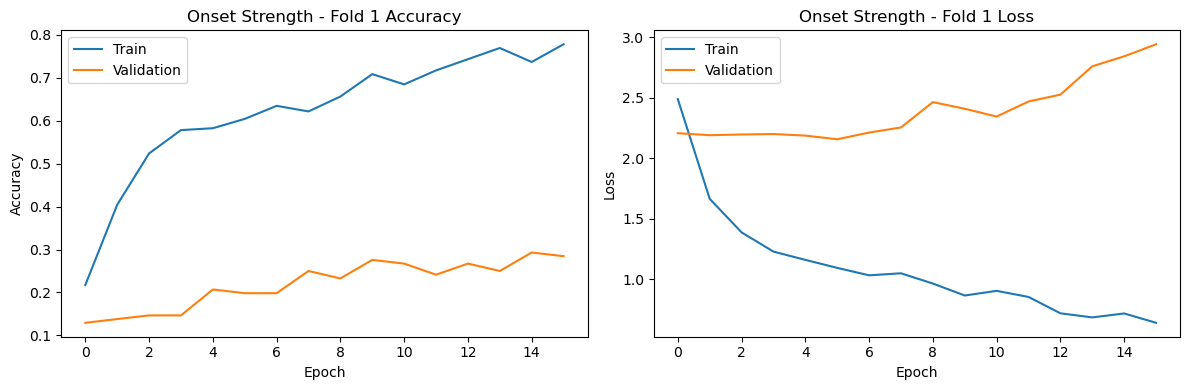

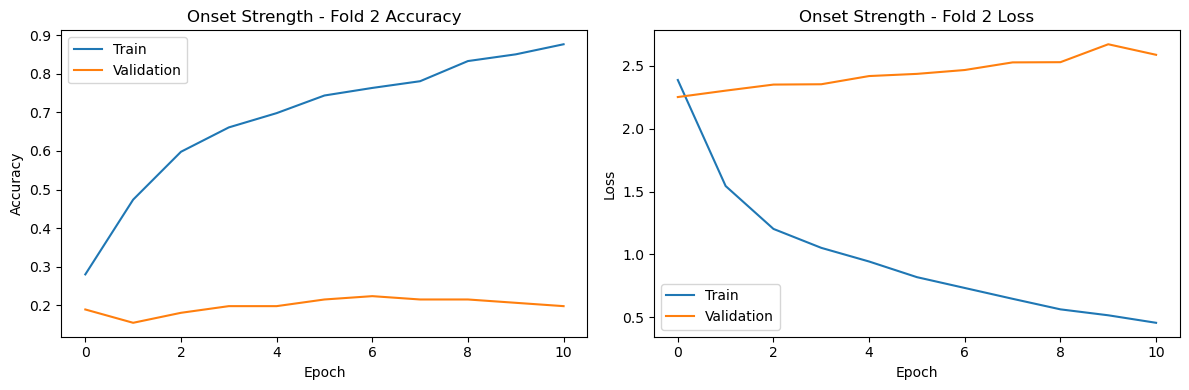

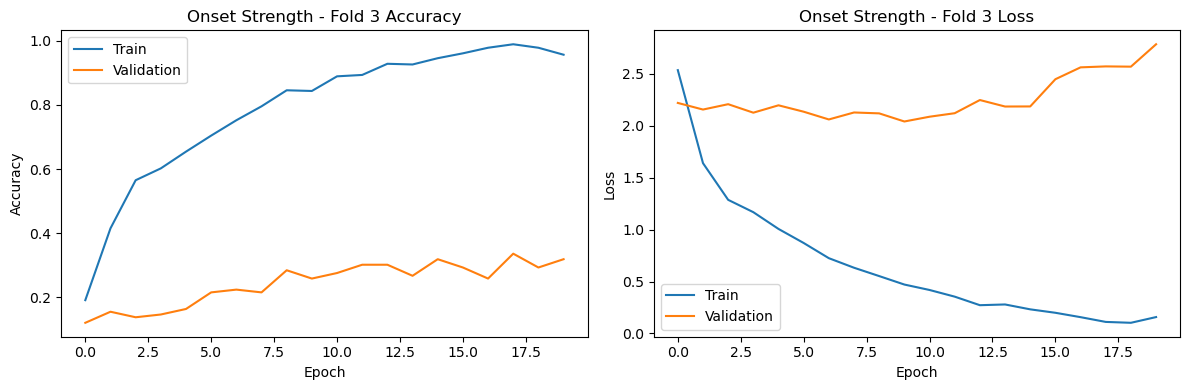

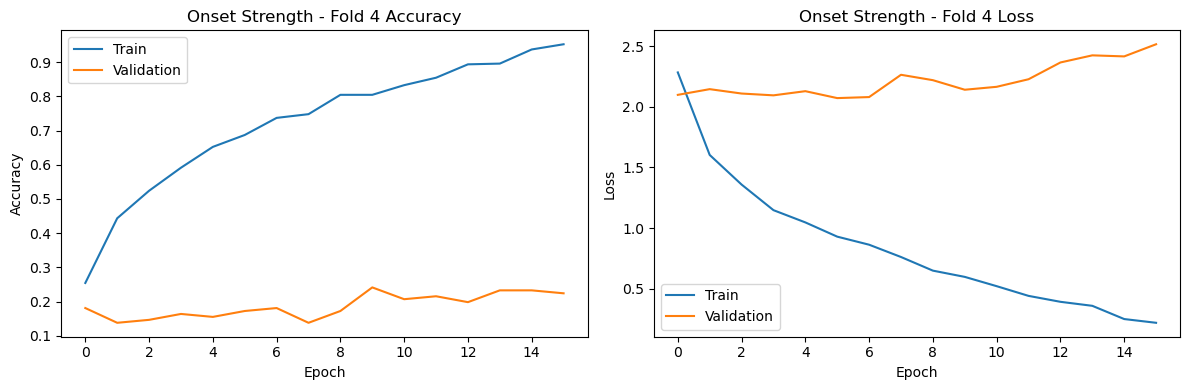

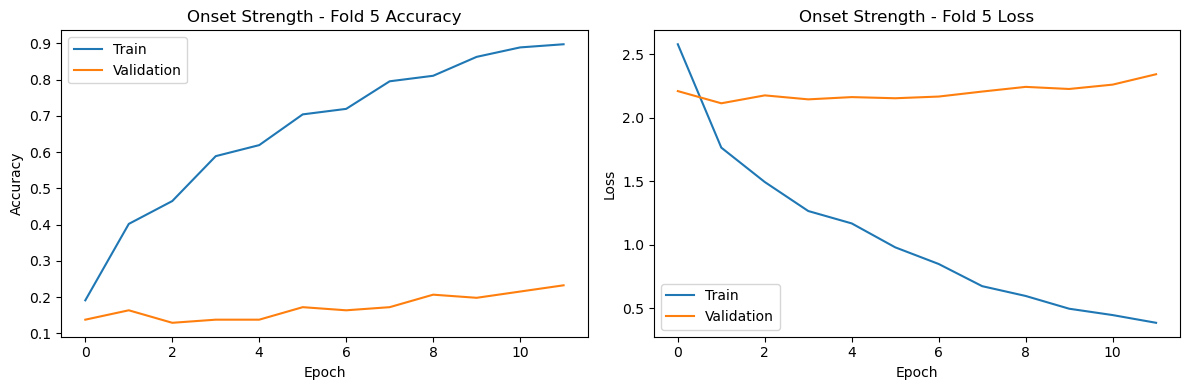

In [11]:
# Plot training/validation accuracy and loss for each model and fold
for feature_type, results in individual_results.items():
    histories = results.get('histories', [])
    if not histories:
        continue
    print(f"\n{'='*40}\n{feature_type.replace('_', ' ').title()} Training History\n{'='*40}")
    for fold, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.get("accuracy", []), label="Train")
        plt.plot(history.get("val_accuracy", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.get("loss", []), label="Train")
        plt.plot(history.get("val_loss", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [12]:
# Get best individual model by mean accuracy
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_acc = np.array(ensemble_results['accuracy_list'])
individual_acc = np.array(individual_results[best_model]['accuracy_list'])

t_stat, p_val = ttest_rel(ensemble_acc, individual_acc)
print(f"Paired t-test p-value (ensemble vs best individual): {p_val:.4e}")
if p_val < 0.05:
    print("Difference is statistically significant (p < 0.05)")
else:
    print("Difference is NOT statistically significant (p >= 0.05)")

Paired t-test p-value (ensemble vs best individual): 1.8921e-02
Difference is statistically significant (p < 0.05)


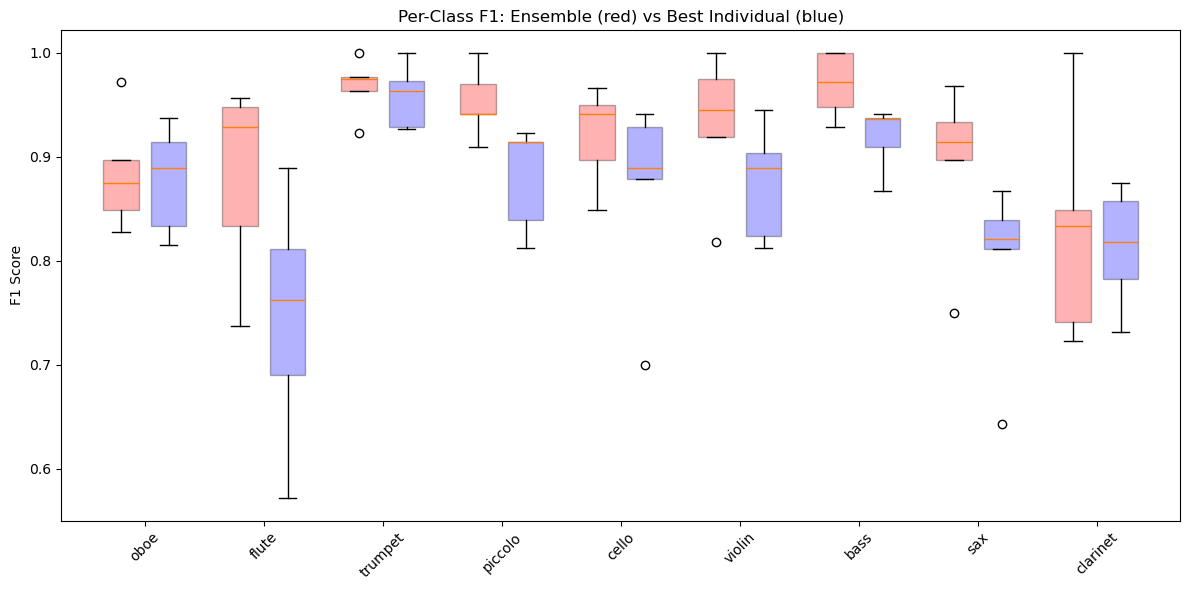

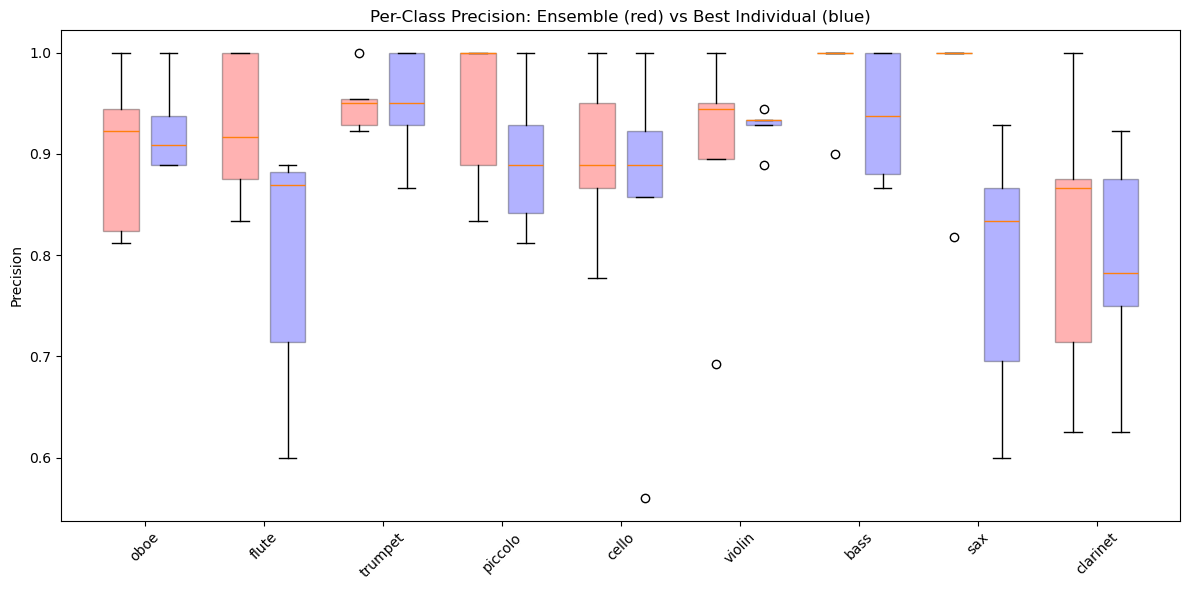

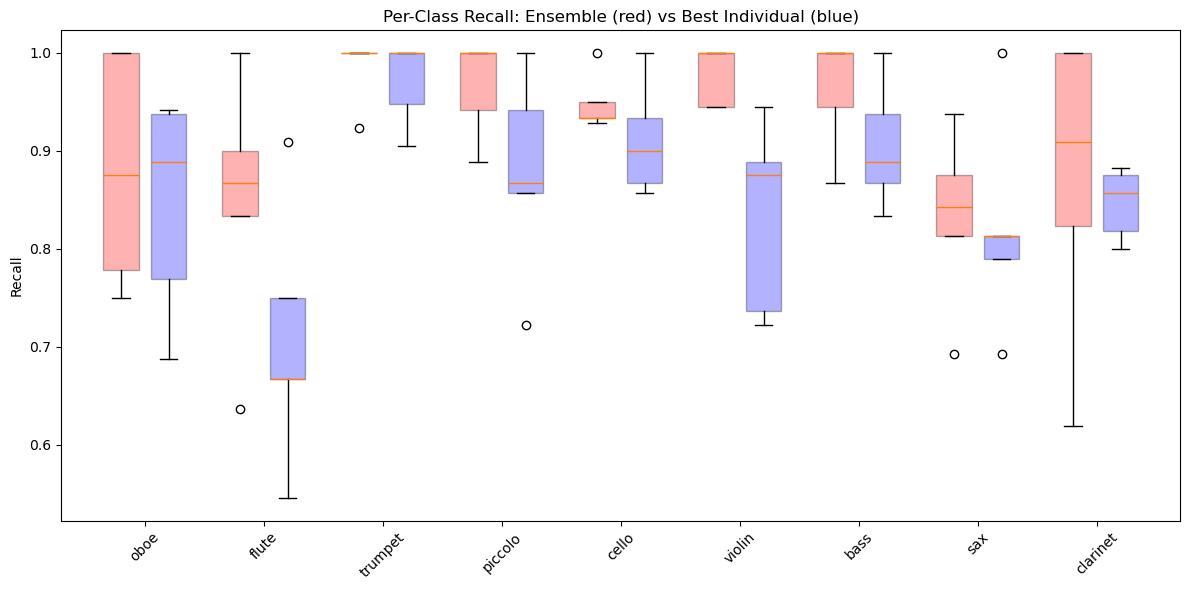

In [12]:
# Compare per-class F1, Precision, Recall between ensemble and best individual model
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_f1, individual_f1 = [], []
ensemble_prec, individual_prec = [], []
ensemble_rec, individual_rec = [], []

class_labels = [str(i) for i in range(len(class_names))]

for fold in range(len(ensemble_results['classification_reports'])):
    e_report = ensemble_results['classification_reports'][fold]
    i_report = individual_results[best_model]['classification_reports'][fold]
    ensemble_f1.append([e_report[c]['f1-score'] for c in class_labels])
    individual_f1.append([i_report[c]['f1-score'] for c in class_labels])
    ensemble_prec.append([e_report[c]['precision'] for c in class_labels])
    individual_prec.append([i_report[c]['precision'] for c in class_labels])
    ensemble_rec.append([e_report[c]['recall'] for c in class_labels])
    individual_rec.append([i_report[c]['recall'] for c in class_labels])

ensemble_f1 = np.array(ensemble_f1)
individual_f1 = np.array(individual_f1)
ensemble_prec = np.array(ensemble_prec)
individual_prec = np.array(individual_prec)
ensemble_rec = np.array(ensemble_rec)
individual_rec = np.array(individual_rec)

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('F1 Score')
plt.title('Per-Class F1: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Precision')
plt.title('Per-Class Precision: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Recall')
plt.title('Per-Class Recall: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

In [13]:
# Show top-3 most confused class pairs for ensemble and best individual (by sum of off-diagonal confusion)
def top_confusions(conf_matrices, class_names, top_n=3):
    total_conf = np.sum(np.array(conf_matrices), axis=0)
    np.fill_diagonal(total_conf, 0)
    flat = total_conf.flatten()
    top_idx = flat.argsort()[-top_n:][::-1]
    for idx in top_idx:
        i, j = divmod(idx, total_conf.shape[1])
        print(f"True: {class_names[i]}, Pred: {class_names[j]}, Count: {total_conf[i, j]}")

print("Top 3 most confused class pairs (Ensemble):")
top_confusions(ensemble_results['confusion_matrices'], class_names)

best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
print("\nTop 3 most confused class pairs (Best Individual):")
top_confusions(individual_results[best_model]['confusion_matrices'], class_names)

Top 3 most confused class pairs (Ensemble):
True: oboe, Pred: clarinet, Count: 7
True: sax, Pred: flute, Count: 4
True: clarinet, Pred: violin, Count: 4

Top 3 most confused class pairs (Best Individual):
True: flute, Pred: cello, Count: 9
True: clarinet, Pred: sax, Count: 7
True: violin, Pred: sax, Count: 6


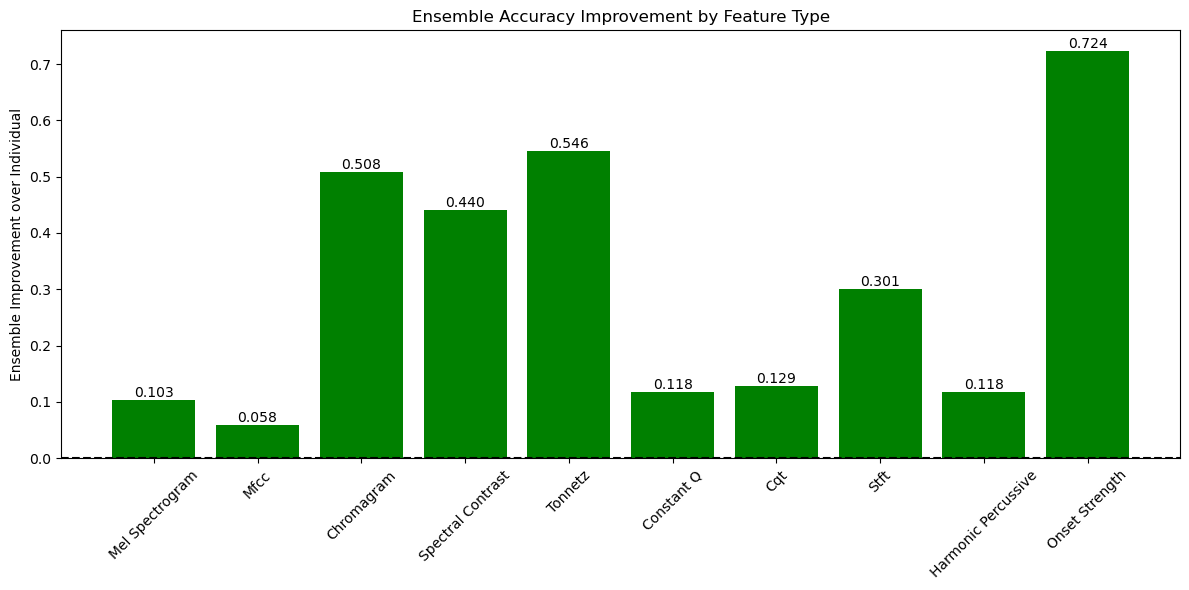

In [14]:
# Bar plot of (ensemble accuracy - individual accuracy) per feature type
improvements = []
for ft in FEATURE_TYPES:
    if ft in individual_results:
        individual_mean = np.mean(individual_results[ft]['accuracy_list'])
        improvement = np.mean(ensemble_results['accuracy_list']) - individual_mean
        improvements.append(improvement)
    else:
        improvements.append(np.nan)

plt.figure(figsize=(12, 6))
bars = plt.bar([ft.replace('_', ' ').title() for ft in FEATURE_TYPES], improvements, color=['green' if imp > 0 else 'red' for imp in improvements])
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Ensemble Improvement over Individual')
plt.title('Ensemble Accuracy Improvement by Feature Type')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{improvements[i]:.3f}", ha='center', va='bottom' if improvements[i] > 0 else 'top')
plt.tight_layout()
plt.show()

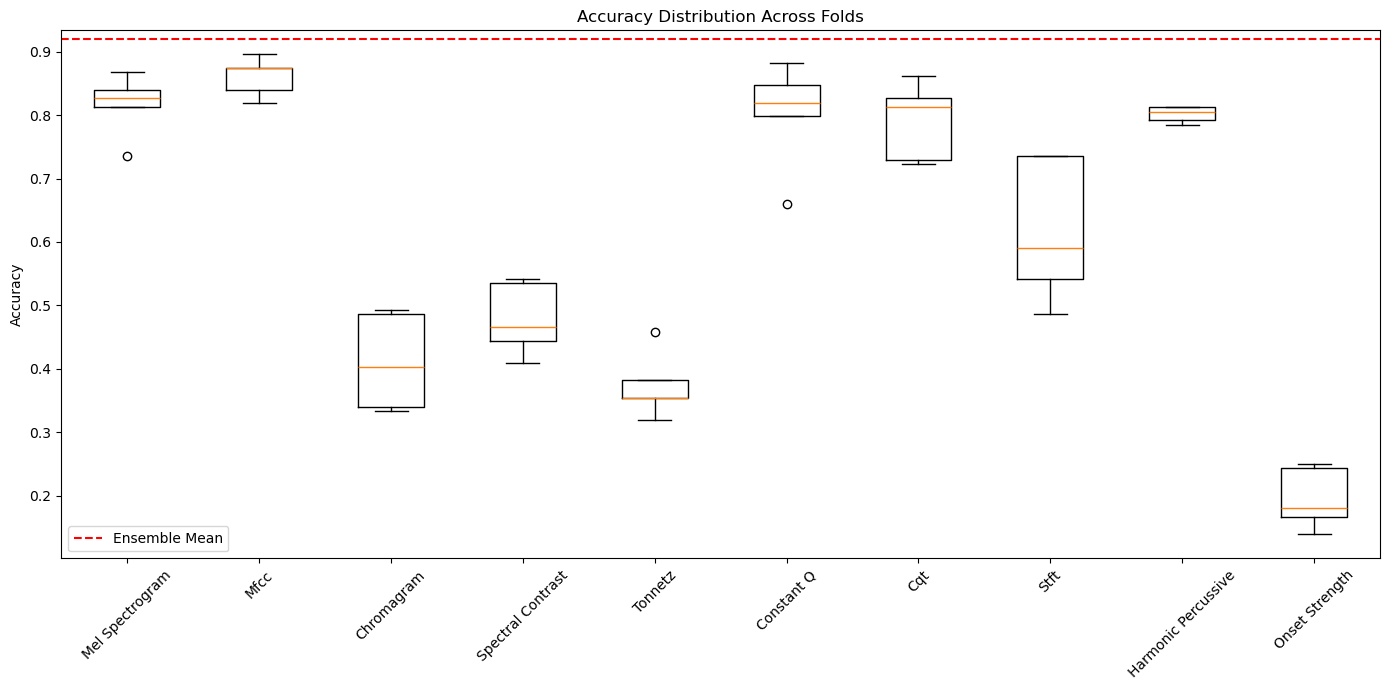

In [15]:
# Boxplot of accuracy distributions across folds for each model and the ensemble
data_for_box = [individual_results[ft]['accuracy_list'] for ft in FEATURE_TYPES if ft in individual_results]
labels = [ft.replace('_', ' ').title() for ft in FEATURE_TYPES if ft in individual_results]

plt.figure(figsize=(14, 7))
plt.boxplot(data_for_box, labels=labels)
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution Across Folds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Show the worst and best performing fold for each model and the ensemble
print("Worst and Best Fold Accuracies:")
for ft in FEATURE_TYPES:
    if ft in individual_results:
        accs = individual_results[ft]['accuracy_list']
        print(f"{ft.replace('_', ' ').title()}: Min={np.min(accs):.4f}, Max={np.max(accs):.4f}")
ensemble_accs = ensemble_results['accuracy_list']
print(f"Ensemble: Min={np.min(ensemble_accs):.4f}, Max={np.max(ensemble_accs):.4f}")

Worst and Best Fold Accuracies:
Mel Spectrogram: Min=0.7361, Max=0.8681
Mfcc: Min=0.8194, Max=0.8958
Chromagram: Min=0.3333, Max=0.4931
Spectral Contrast: Min=0.4097, Max=0.5417
Tonnetz: Min=0.3194, Max=0.4583
Constant Q: Min=0.6597, Max=0.8819
Cqt: Min=0.7222, Max=0.8611
Stft: Min=0.4861, Max=0.7361
Harmonic Percussive: Min=0.7847, Max=0.8125
Onset Strength: Min=0.1389, Max=0.2500
Ensemble: Min=0.9028, Max=0.9653
